### 0. Introducción

En el siguiente docuemento vamos a analizar los resultados de los cuestionarios de los talleres que organizarón el grupo TIDE. Los talleres se realizarón para saber la opinión de diferentes docentes sobre el diseño de una herramienta visual que les ayudará a crear actividades. 

Los cuestionarios tienen preguntas personales y preguntas sobre la herramienta visual. El segundo tipo de respuesta se contestan con puntuación de 0 a 7.

A continuación os explicaremos como hemos llevado a cabo el análisis:

### 1. Librerías

In [2]:
!pip install --upgrade matplotlib

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 

### 2. Obtención de datos

Vamos a utilizar un excel donde albergamos las respuestas de los encuestados de los 3 talleres. Este excel tiene el nombre de "ALL DATA".

In [4]:
data = pd.read_excel('ALL DATA .xlsx')

In [5]:
data.head()

,Taller,Marca de temps,Código de participante,¿Qué edad tienes?,Eres,¿Tienes experiencia previa enseñando?,"Antes de participar en el taller, ¿Sabías qué era la ciencia ciudadana?","Si tu respuesta es que sí, explica si has participado en algún proyecto de ciencia ciudadana",Antes de participar en el taller ¿Sabías qué eran los objetivos de desarrollo sostenible (ODS)?,¿Qué materiales o herramientas crees que podrían inspirarte a crear actividades de aprendizaje sobre ciencia?,¿Cómo elegirías la temática para diseñar una actividad que combine ciencia y tecnología en el aula? (escoge una o varias),Gráfico sobre las temáticas tratadas en ciencia ciudadana,Me parece útil porque…,Gráfico sobre las herramientas utilizadas en ciencia ciudadana,Me parece útil porque….1,"Mapa regional, nacional o Europeo con los proyectos geolocalizados",Me parece útil porque….2,"Mapa regional, nacional o Europeo con las asociaciones u organizaciones de ciencia ciudadana",Me parece útil porque….3,Gráficos con datos reales sobre diferentes problemáticas reales,Me parece útil porque….4,¿Qué otras visualizaciones crees que podrían ser útiles?,Título del proyecto,Me parece útil porque….5,Descripción del proyecto,Me parece útil porque….6,Logo del proyecto,Me parece útil porque….7,Web del proyecto,Me parece útil porque….8,Datos y/o explicación sobre la temática tratada,Me parece útil porque….9,Información sobre el/los lugares dónde se lleva a cabo el proyecto,Me parece útil porque….10,Información técnica sobre la investigación que los científicos llevan a cabo (ej. metodología),Me parece útil porque….11,Herramientas utilizadas,Me parece útil porque….12,Temática o campo de investigación del proyecto,Me parece útil porque….13,Tareas o formas de participación de los voluntarios,Me parece útil porque….14,Impacto del proyecto,Me parece útil porque….15,Recursos adicionales (Educativos o no),Me parece útil porque….16,Redes sociales,Me parece útil porque….17,Estado del proyecto,Me parece útil porque….18,"Información adicional (ej. noticias, artículos científicos, etc…)",Me parece útil porque….19,Objetivos de aprendizaje al participar en el proyecto,Me parece útil porque….20,Duración de las tareas o de la participación (si fueran varias),Me parece útil porque….21,Duración del proyecto,Me parece útil porque….22,"Requisitos para participar, si los hubiera (ej. conocimiento previo)",Me parece útil porque….23,Objetivos de aprendizaje,Me parece útil porque….24,Área de investigación,Me parece útil porque….25,¿Qué otra información crees que podría ser útil?,Título de la actividad,Me parece útil porque….26,Descripción de la actividad,Me parece útil porque….27,Metodología utilizada,Me parece útil porque….28,Duración de la actividad,Me parece útil porque….29,Evaluación de la actividad,Me parece útil porque….30,Motivación a participar o durante la actividad,Me parece útil porque….31,Cómo involucrar a la comunidad educativa a participar en la actividad,Me parece útil porque….32,Ámbito en el que se desarrolla la actividad,Me parece útil porque….33,Resultados de la actividad,Me parece útil porque….34,Herramientas a utilizar,Me parece útil porque….35,Contenido curricular,Me parece útil porque….36,Nivel/es educativo en el que se puede desarrollar,Me parece útil porque….37,¿Qué otra información crees que podría ser útil?.1,"Por último, si la herramienta fuera digital, ¿Qué funcionalidades crees que debería tener para poder visualizar mejor los datos?",Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96
0,UPF Grants,2021-12-14 18:00:25.579,10.0,De 51 a 60 años,NaN,Profesor/a de un centro público,Sí,"Si, he participat",Sí,"Revistas científicas, Búsqueda en internet, Re...","Por el interés de la clase, Porque alguna asoc...",7.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,Dades en format infografic,6.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,6.0,Em resultar

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 97 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype         
---  ------                                                                                                                             --------------  -----         
 0   Taller                                                                                                                             72 non-null     object        
 1   Marca de temps                                                                                                                     72 non-null     datetime64[ns]
 2   Código de participante                                                                                                             70 non-null     float64       
 3   ¿Qué edad tienes?                                        

### 3. Preprocesado de datos

A continuación haremos los cambios para poder trabajar de forma más óptima con nuestro dataset.

In [7]:
# realizamos copia del dataset y cambiamos los nombres de las columnas para que tengan la misma forma
DF = data.copy()
DF.columns = DF.columns.str.strip()
DF.columns = DF.columns.str.replace(' ', '_')
DF.columns = DF.columns.str.lower()

Eliminamos y modificamos algunas columnas para poder trabajar mejor con ellas

In [8]:
df = DF.copy()

# Cambios el tipo de dato'código_de_participante' a string
df['código_de_participante'] = df['código_de_participante'].astype(str)

# Eliminamos columnas que no utilizaremos
df = df.drop(['unnamed:_91',
 'unnamed:_92',
 'unnamed:_93',
 'unnamed:_94',
 'unnamed:_95',
 'unnamed:_96'], axis = 1)

# Al tener diferentes tipos de edades, agregamos todos en los mismos rangos:

df['¿qué_edad_tienes?'] = df['¿qué_edad_tienes?'].map({'De 51 a 60 años':'51 - 60 años',
                                                       'De 41 a 50 años':'41 - 50 años',
                                                       'De 31 a 40 años':'31 - 40 años',
                                                       'De 20 a 30 años':'20 - 30 años',
                                                       'I am 51 a 60 years old':'51 - 60 años',
                                                       'I am 20 a 30 years old':'20 - 30 años',
                                                       'I am 41 a 50 years old':'41 - 50 años',
                                                       'I am 31 a 40 years old':'31 - 40 años',
                                                       'Prefiero no decir':'NS / NC'})

df['eres'] = df['eres'].fillna('0')
df['eres'] = df['eres'].map({'I am female':'Mujer',
                             'Mujer':'Mujer',
                             'Hombre':'Hombre',
                             '0': 'NS / NC'})
#df['¿tienes_experiencia_previa_enseñando?'] = df['¿tienes_experiencia_previa_enseñando?'].fillna('NS / NC')
df['¿tienes_experiencia_previa_enseñando?'] = df['¿tienes_experiencia_previa_enseñando?'].map(
    {'Como profesor/a particular': 'Particular',
     'Profesor/a de un centro público': 'Centro público',
     'Profesor/a de un centro concertado' : 'Centro concertado',
     'Como profesor/a particular, Profesor/a de un centro público' : 'Particular y centro público',
     'I have done teaching in a public center' : 'Centro público',
     'Universidad': 'Universidad',
     'Como profesor/a particular, Profesor/a de un centro público, Profesor/a de un centro concertado': 'Particular, centro público, centro concertado',
     'Como profesor/a particular, Educadora ambiental' : 'Centro público y extracurriculares',
     'Profesor/a de un centro privado, Idiomas': 'Centro Privado y extracurricuales',
     'jiu-jitsu' : 'Extracurriculares',
     'Como profesor/a particular, docencia universitaria' : 'Particular y universidad',
     'I dont have prior teaching experiences' : 'Sin experiencia',
     'Como profesor/a particular, universidad extranjera y prácticas de máster': 'Particular y universidad',
     'No tengo' : 'Sin experiencia',
     'Como profesor/a particular, estudiante' : 'Particular',
     'He dado alguna clase durante el PhD': 'Universidad',
     'Profesora unviersitaria' : 'Universidad', 
     'no' : 'Sin experiencia',
     '0': 'NS / NC'})

df['antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?'] = df['antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?'].map({
    'No': 'No',
    'Sí': 'Si', 
    'Yes' : 'Si',
    '0' : 'NS / NC'})

df['antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?'] = df['antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?'].fillna('0')
df['antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?'] = df['antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?'].map({
     'No': 'No',
    'Sí': 'Si', 
    'Yes' : 'Si',
    '0' : 'NS / NC'})

Seguidamente, separaremos los tipos de variables que encontramos en nuestro dataset. Esto lo haremos para separar entre las preguntas de los cuestionarios y las respuestas.

In [9]:
# Definimos las variables númericas
num_variables = [column for column, datatype in df.dtypes.items() if datatype in (np.int64, np.float64)]

# Definimos las variables categóricas
categorical_variables = [column for column in df.columns if column not in num_variables]

Una vez realizados los siguientes cambios podremos ver:

In [10]:
#preguntar porque ocurre.
df['¿tienes_experiencia_previa_enseñando?'] = df['¿tienes_experiencia_previa_enseñando?'].fillna('NS / NC')
df.head()

,taller,marca_de_temps,código_de_participante,¿qué_edad_tienes?,eres,¿tienes_experiencia_previa_enseñando?,"antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?","si_tu_respuesta_es_que_sí,_explica_si_has_participado_en_algún_proyecto_de_ciencia_ciudadana",antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?,¿qué_materiales_o_herramientas_crees_que_podrían_inspirarte_a_crear_actividades_de_aprendizaje_sobre_ciencia?,¿cómo_elegirías_la_temática_para_diseñar_una_actividad_que_combine_ciencia_y_tecnología_en_el_aula?_(escoge_una_o_varias),gráfico_sobre_las_temáticas_tratadas_en_ciencia_ciudadana,me_parece_útil_porque…,gráfico_sobre_las_herramientas_utilizadas_en_ciencia_ciudadana,me_parece_útil_porque….1,"mapa_regional,_nacional_o_europeo_con_los_proyectos_geolocalizados",me_parece_útil_porque….2,"mapa_regional,_nacional_o_europeo_con_las_asociaciones_u_organizaciones_de_ciencia_ciudadana",me_parece_útil_porque….3,gráficos_con_datos_reales_sobre_diferentes_problemáticas_reales,me_parece_útil_porque….4,¿qué_otras_visualizaciones_crees_que_podrían_ser_útiles?,título_del_proyecto,me_parece_útil_porque….5,descripción_del_proyecto,me_parece_útil_porque….6,logo_del_proyecto,me_parece_útil_porque….7,web_del_proyecto,me_parece_útil_porque….8,datos_y/o_explicación_sobre_la_temática_tratada,me_parece_útil_porque….9,información_sobre_el/los_lugares_dónde_se_lleva_a_cabo_el_proyecto,me_parece_útil_porque….10,información_técnica_sobre_la_investigación_que_los_científicos_llevan_a_cabo_(ej._metodología),me_parece_útil_porque….11,herramientas_utilizadas,me_parece_útil_porque….12,temática_o_campo_de_investigación_del_proyecto,me_parece_útil_porque….13,tareas_o_formas_de_participación_de_los_voluntarios,me_parece_útil_porque….14,impacto_del_proyecto,me_parece_útil_porque….15,recursos_adicionales_(educativos_o_no),me_parece_útil_porque….16,redes_sociales,me_parece_útil_porque….17,estado_del_proyecto,me_parece_útil_porque….18,"información_adicional_(ej._noticias,_artículos_científicos,_etc…)",me_parece_útil_porque….19,objetivos_de_aprendizaje_al_participar_en_el_proyecto,me_parece_útil_porque….20,duración_de_las_tareas_o_de_la_participación_(si_fueran_varias),me_parece_útil_porque….21,duración_del_proyecto,me_parece_útil_porque….22,"requisitos_para_participar,_si_los_hubiera_(ej._conocimiento_previo)",me_parece_útil_porque….23,objetivos_de_aprendizaje,me_parece_útil_porque….24,área_de_investigación,me_parece_útil_porque….25,¿qué_otra_información_crees_que_podría_ser_útil?,título_de_la_actividad,me_parece_útil_porque….26,descripción_de_la_actividad,me_parece_útil_porque….27,metodología_utilizada,me_parece_útil_porque….28,duración_de_la_actividad,me_parece_útil_porque….29,evaluación_de_la_actividad,me_parece_útil_porque….30,motivación_a_participar_o_durante_la_actividad,me_parece_útil_porque….31,cómo_involucrar_a_la_comunidad_educativa_a_participar_en_la_actividad,me_parece_útil_porque….32,ámbito_en_el_que_se_desarrolla_la_actividad,me_parece_útil_porque….33,resultados_de_la_actividad,me_parece_útil_porque….34,herramientas_a_utilizar,me_parece_útil_porque….35,contenido_curricular,me_parece_útil_porque….36,nivel/es_educativo_en_el_que_se_puede_desarrollar,me_parece_útil_porque….37,¿qué_otra_información_crees_que_podría_ser_útil?.1,"por_último,__si_la_herramienta_fuera_digital,_¿qué_funcionalidades_crees_que_debería_tener_para_poder_visualizar_mejor_los_datos?"
0,UPF Grants,2021-12-14 18:00:25.579,10.0,51 - 60 años,NS / NC,Centro público,Si,"Si, he participat",Si,"Revistas científicas, Búsqueda en internet, Re...","Por el interés de la clase, Porque alguna asoc...",7.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,Dades en format infografic,6.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,6.0,Em resultaria d utilitat,7.0,Em resultaria d utilitat,7.0,Em resultaria d utilitat,7.0,Em resulta

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 91 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype         
---  ------                                                                                                                             --------------  -----         
 0   taller                                                                                                                             72 non-null     object        
 1   marca_de_temps                                                                                                                     72 non-null     datetime64[ns]
 2   código_de_participante                                                                                                             72 non-null     object        
 3   ¿qué_edad_tienes?                                        

In [12]:
df.describe()

,gráfico_sobre_las_temáticas_tratadas_en_ciencia_ciudadana,gráfico_sobre_las_herramientas_utilizadas_en_ciencia_ciudadana,"mapa_regional,_nacional_o_europeo_con_los_proyectos_geolocalizados","mapa_regional,_nacional_o_europeo_con_las_asociaciones_u_organizaciones_de_ciencia_ciudadana",gráficos_con_datos_reales_sobre_diferentes_problemáticas_reales,título_del_proyecto,descripción_del_proyecto,logo_del_proyecto,web_del_proyecto,datos_y/o_explicación_sobre_la_temática_tratada,información_sobre_el/los_lugares_dónde_se_lleva_a_cabo_el_proyecto,información_técnica_sobre_la_investigación_que_los_científicos_llevan_a_cabo_(ej._metodología),herramientas_utilizadas,temática_o_campo_de_investigación_del_proyecto,tareas_o_formas_de_participación_de_los_voluntarios,impacto_del_proyecto,recursos_adicionales_(educativos_o_no),redes_sociales,estado_del_proyecto,"información_adicional_(ej._noticias,_artículos_científicos,_etc…)",objetivos_de_aprendizaje_al_participar_en_el_proyecto,duración_de_las_tareas_o_de_la_participación_(si_fueran_varias),duración_del_proyecto,"requisitos_para_participar,_si_los_hubiera_(ej._conocimiento_previo)",objetivos_de_aprendizaje,título_de_la_actividad,descripción_de_la_actividad,metodología_utilizada,duración_de_la_actividad,evaluación_de_la_actividad,motivación_a_participar_o_durante_la_actividad,cómo_involucrar_a_la_comunidad_educativa_a_participar_en_la_actividad,ámbito_en_el_que_se_desarrolla_la_actividad,resultados_de_la_actividad,herramientas_a_utilizar,contenido_curricular
count,70.000000,70.000000,70.00000,70.000000,69.000000,71.000000,70.000000,71.000000,69.000000,69.000000,71.000000,71.000000,72.000000,70.000000,71.000000,71.000000,69.000000,71.000000,71.000000,69.000000,71.000000,71.000000,71.000000,71.000000,23.000000,23.000000,22.000000,23.000000,22.000000,23.000000,23.000000,23.000000,23.000000,23.000000,22.000000,22.000000
mean,4.714286,4.842857,4.20000,4.442857,5.000000,4.873239,5.642857,3.394366,5.086957,5.260870,4.746479,5.070423,4.819444,4.714286,5.380282,4.774648,4.376812,4.211268,4.253521,4.043478,5.338028,4.633803,4.549296,5.014085,5.739130,5.956522,6.500000,5.826087,5.681818,5.695652,5.260870,5.739130,5.217391,5.869565,5.954545,5.590909
std,1.598395,1.450994,1.79855,1.647446,1.635992,1.492166,1.239866,1.625501,1.729834,1.346588,1.574060,1.397180,1.577361,1.342104,1.427948,1.741897,1.486225,1.689594,1.670913,1.566513,1.351651,1.683868,1.601684,1.752492,1.251086,0.928256,0.672593,1.370208,1.393398,1.329210,1.483773,1.355708,1.506245,1.632186,1.430194,1.469016
min,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,3.00000,3.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.500000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,5.500000,5.500000,6.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.500000,5.250000,5.000000
50%,5.000000,5.000000,4.00000,5.000000,5.000000,5.000000,6.000000,3.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,4.000000,4.000000,4.000000,4.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,7.000000,4.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,5.500000,5.000000,6.000000,6.000000,6.000000,6.500000,6.500000,7.000000,7.000000,7.000000,7.000000,7.000000,6.500000,7.000000,7.000000,7.000000,7.000000,7.000000
max,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000

In [13]:
num_variables

['gráfico_sobre_las_temáticas_tratadas_en_ciencia_ciudadana',
 'gráfico_sobre_las_herramientas_utilizadas_en_ciencia_ciudadana',
 'mapa_regional,_nacional_o_europeo_con_los_proyectos_geolocalizados',
 'mapa_regional,_nacional_o_europeo_con_las_asociaciones_u_organizaciones_de_ciencia_ciudadana',
 'gráficos_con_datos_reales_sobre_diferentes_problemáticas_reales',
 'título_del_proyecto',
 'descripción_del_proyecto',
 'logo_del_proyecto',
 'web_del_proyecto',
 'datos_y/o_explicación_sobre_la_temática_tratada',
 'información_sobre_el/los_lugares_dónde_se_lleva_a_cabo_el_proyecto',
 'información_técnica_sobre_la_investigación_que_los_científicos_llevan_a_cabo_(ej._metodología)',
 'herramientas_utilizadas',
 'temática_o_campo_de_investigación_del_proyecto',
 'tareas_o_formas_de_participación_de_los_voluntarios',
 'impacto_del_proyecto',
 'recursos_adicionales_(educativos_o_no)',
 'redes_sociales',
 'estado_del_proyecto',
 'información_adicional_(ej._noticias,_artículos_científicos,_etc…)',
 

In [14]:
categorical_variables

['taller',
 'marca_de_temps',
 'código_de_participante',
 '¿qué_edad_tienes?',
 'eres',
 '¿tienes_experiencia_previa_enseñando?',
 'antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?',
 'si_tu_respuesta_es_que_sí,_explica_si_has_participado_en_algún_proyecto_de_ciencia_ciudadana',
 'antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?',
 '¿qué_materiales_o_herramientas_crees_que_podrían_inspirarte_a_crear_actividades_de_aprendizaje_sobre_ciencia?',
 '¿cómo_elegirías_la_temática_para_diseñar_una_actividad_que_combine_ciencia_y_tecnología_en_el_aula?_(escoge_una_o_varias)',
 'me_parece_útil_porque…',
 'me_parece_útil_porque….1',
 'me_parece_útil_porque….2',
 'me_parece_útil_porque….3',
 'me_parece_útil_porque….4',
 '¿qué_otras_visualizaciones_crees_que_podrían_ser_útiles?',
 'me_parece_útil_porque….5',
 'me_parece_útil_porque….6',
 'me_parece_útil_porque….7',
 'me_parece_útil_porque….8',
 'me_parece_útil_porque….9',
 'me_pa

### 4. EDA. Análisis de datos

En esta parte del análisis, estudiaremos los datos y intentaremos extraer algunas conclusiones.

### 4.1 Análisis de los Encuestados

Primero estudiaremos a los participantes de los talleres. Intentaremos extraer las diferentes características. Para ellos utilizaremos las primeras preguntas del cuestionario. Para filtrarlas, utilizaremos las variables categóricas y cogeremos las que nos interesan estudiar.

In [15]:
datos_encuestados = ['taller',
 'marca_de_temps',
 'código_de_participante',
 '¿qué_edad_tienes?',
 'eres',
 '¿tienes_experiencia_previa_enseñando?',
 'antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?',
 'si_tu_respuesta_es_que_sí,_explica_si_has_participado_en_algún_proyecto_de_ciencia_ciudadana',
 'antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?',
 '¿qué_materiales_o_herramientas_crees_que_podrían_inspirarte_a_crear_actividades_de_aprendizaje_sobre_ciencia?',
 '¿cómo_elegirías_la_temática_para_diseñar_una_actividad_que_combine_ciencia_y_tecnología_en_el_aula?_(escoge_una_o_varias)']

In [16]:
df_encuestados = df[datos_encuestados]
df_encuestados.head()

,taller,marca_de_temps,código_de_participante,¿qué_edad_tienes?,eres,¿tienes_experiencia_previa_enseñando?,"antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?","si_tu_respuesta_es_que_sí,_explica_si_has_participado_en_algún_proyecto_de_ciencia_ciudadana",antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?,¿qué_materiales_o_herramientas_crees_que_podrían_inspirarte_a_crear_actividades_de_aprendizaje_sobre_ciencia?,¿cómo_elegirías_la_temática_para_diseñar_una_actividad_que_combine_ciencia_y_tecnología_en_el_aula?_(escoge_una_o_varias)
0,UPF Grants,2021-12-14 18:00:25.579,10.0,51 - 60 años,NS / NC,Centro público,Si,"Si, he participat",Si,"Revistas científicas, Búsqueda en internet, Re...","Por el interés de la clase, Porque alguna asoc..."
1,UPF Grants,2021-12-14 18:05:39.415,12.0,41 - 50 años,Mujer,Centro público,Si,"Individualment, laboralment a la feina anterio...",Si,"Búsqueda en internet, Repositorios abiertos co...","Por el currículum, Por mi propio interés"
2,UPF Grants,2021-12-14 18:06:48.849,13.0,41 - 50 años,Hombre,"Particular, centro público, centro concertado",Si,Calidad del aire issglobal,No,"Revistas científicas, Búsqueda en internet, Re...","Por el currículum, Porque el centro lo ha prop..."
3,UPF Grants,2021-12-14 18:07:42.925,8.0,31 - 40 años,Mujer,Centro público,Si,No.,Si,"Búsqueda en internet, Repositorios abiertos co...","Por el currículum, Porque el centro lo ha prop..."
4,UPF Grants,2021-12-14 18:08:14.526,14.0,41 - 50 años,Hombre,Centro público,No,NaN,Si,"Búsqueda en internet, Repositorios abiertos co...","Por el currículum, Por el interés de la clase"


##### Gráficos generales

Máster profesorado    49
UPF Grants            18
Scientix               5
Name: taller, dtype: int64


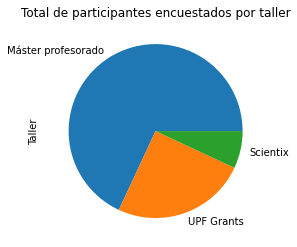

In [17]:
print(df_encuestados['taller'].value_counts())
df_encuestados['taller'].value_counts().plot(kind='pie', ylabel='Taller')
plt.title('Total de participantes encuestados por taller')
plt.show()

20 - 30 años    35
41 - 50 años    16
31 - 40 años    15
51 - 60 años     5
NS / NC          1
Name: ¿qué_edad_tienes?, dtype: int64


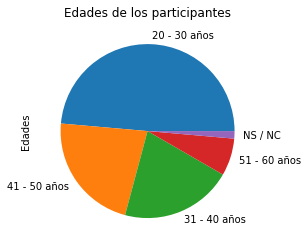

In [18]:
print(df_encuestados['¿qué_edad_tienes?'].value_counts())
df_encuestados['¿qué_edad_tienes?'].value_counts().plot(kind='pie', ylabel='Edades')
plt.title('Edades de los participantes')
plt.show()

Mujer      44
Hombre     25
NS / NC     3
Name: eres, dtype: int64


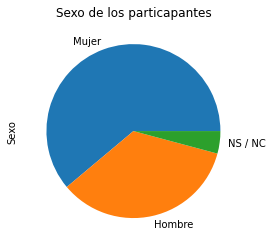

In [19]:
print(df_encuestados['eres'].value_counts())
df_encuestados['eres'].value_counts().plot(kind='pie', ylabel='Sexo')
plt.title('Sexo de los particapantes')
plt.show()

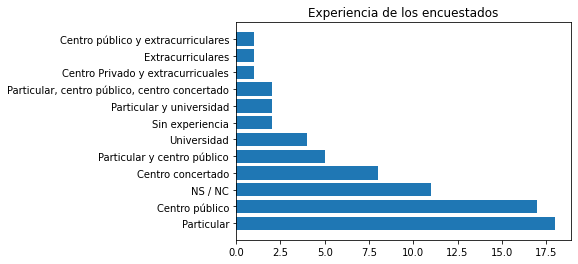

In [20]:
count = df_encuestados['¿tienes_experiencia_previa_enseñando?'].value_counts()
fig, ax = plt.subplots()
ax.barh(count.index,count.values)
plt.title('Experiencia de los encuestados')
plt.show()

No    42
Si    30
Name: antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?, dtype: int64


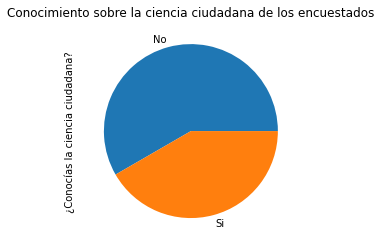

In [21]:
print(df_encuestados['antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?'].value_counts())
df_encuestados['antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?'].value_counts().plot(kind='pie', ylabel='¿Conocías la ciencia ciudadana?')
plt.title('Conocimiento sobre la ciencia ciudadana de los encuestados')
plt.show()

Si         36
No         35
NS / NC     1
Name: antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?, dtype: int64


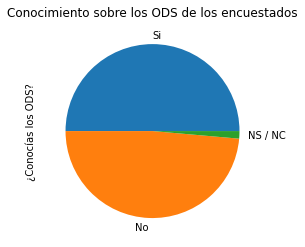

In [22]:
print(df_encuestados['antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?'].value_counts())
df_encuestados['antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?'].value_counts().plot(kind='pie', ylabel='¿Conocías los ODS?')
plt.title('Conocimiento sobre los ODS de los encuestados')
plt.show()

#### Gráficos cruzados

**Edad, Sexo, Experiencia, Conocimiento ciencia ciudadana y Conocimiento ODS por taller**

A continuación visualizaremos Edades
Pertenecen al taller de UPF Grants
41 - 50 años    7
31 - 40 años    5
20 - 30 años    3
Name: ¿qué_edad_tienes?, dtype: int64


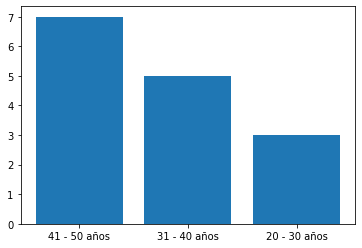

A continuación visualizaremos Edades
Pertenecen al taller de Scientix
41 - 50 años    2
20 - 30 años    1
31 - 40 años    1
Name: ¿qué_edad_tienes?, dtype: int64


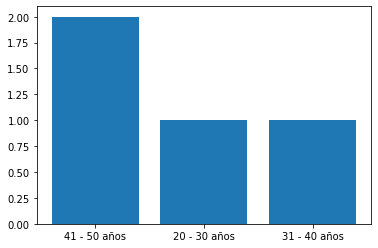

A continuación visualizaremos Edades
Pertenecen al taller de Máster profesorado
20 - 30 años    31
31 - 40 años     9
41 - 50 años     7
Name: ¿qué_edad_tienes?, dtype: int64


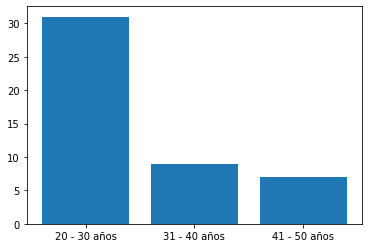

A continuación visualizaremos Sexo
Pertenecen al taller de UPF Grants
Hombre     10
Mujer       7
NS / NC     1
Name: eres, dtype: int64


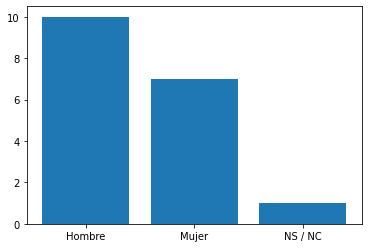

A continuación visualizaremos Sexo
Pertenecen al taller de Scientix
Mujer    5
Name: eres, dtype: int64


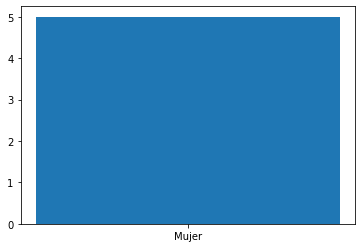

A continuación visualizaremos Sexo
Pertenecen al taller de Máster profesorado
Mujer      32
Hombre     15
NS / NC     2
Name: eres, dtype: int64


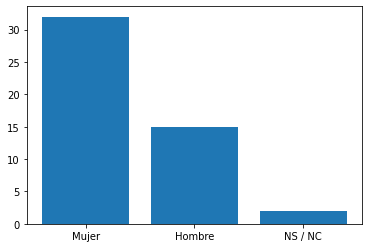

A continuación visualizaremos Experiencia
Pertenecen al taller de UPF Grants
Centro concertado              7
Centro público                 7
Particular y centro público    2
Name: ¿tienes_experiencia_previa_enseñando?, dtype: int64


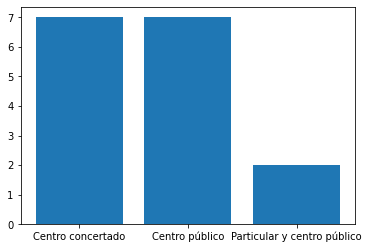

A continuación visualizaremos Experiencia
Pertenecen al taller de Scientix
Centro público    4
NS / NC           1
Name: ¿tienes_experiencia_previa_enseñando?, dtype: int64


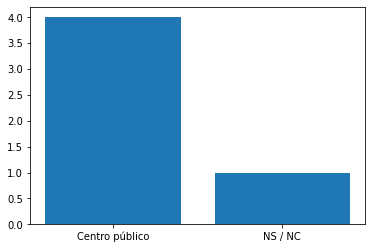

A continuación visualizaremos Experiencia
Pertenecen al taller de Máster profesorado
Particular        18
NS / NC           10
Centro público     6
Name: ¿tienes_experiencia_previa_enseñando?, dtype: int64


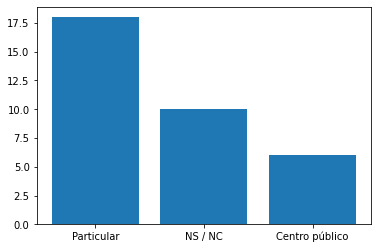

A continuación visualizaremos Conocimiento ciencia ciudadana
Pertenecen al taller de UPF Grants
Si    11
No     7
Name: antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?, dtype: int64


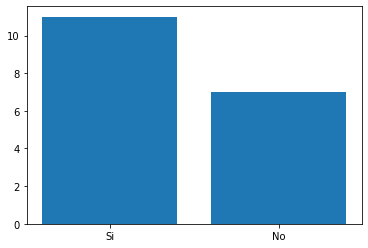

A continuación visualizaremos Conocimiento ciencia ciudadana
Pertenecen al taller de Scientix
No    3
Si    2
Name: antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?, dtype: int64


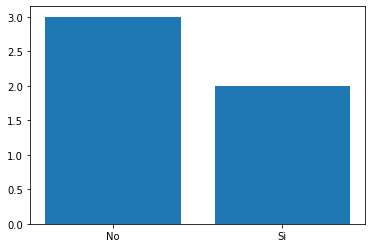

A continuación visualizaremos Conocimiento ciencia ciudadana
Pertenecen al taller de Máster profesorado
No    32
Si    17
Name: antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?, dtype: int64


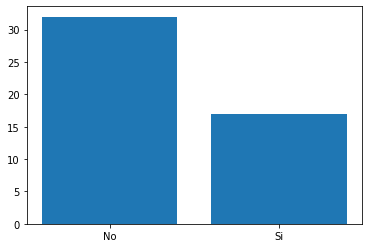

A continuación visualizaremos Conocimiento ODS
Pertenecen al taller de UPF Grants
Si         13
No          4
NS / NC     1
Name: antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?, dtype: int64


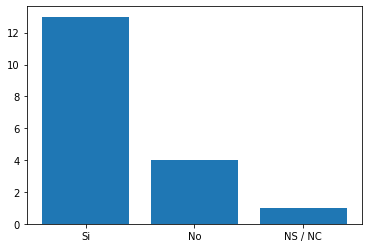

A continuación visualizaremos Conocimiento ODS
Pertenecen al taller de Scientix
Si    4
No    1
Name: antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?, dtype: int64


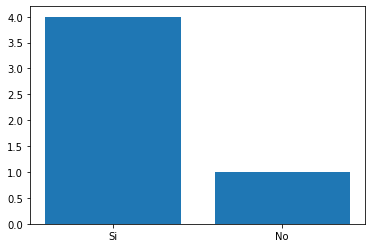

A continuación visualizaremos Conocimiento ODS
Pertenecen al taller de Máster profesorado
No    30
Si    19
Name: antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?, dtype: int64


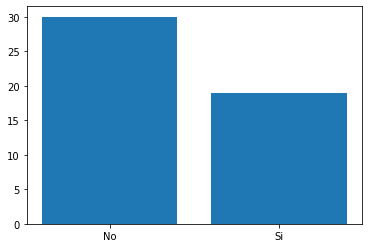

In [23]:
filtros = [
 '¿qué_edad_tienes?',
 'eres',
 '¿tienes_experiencia_previa_enseñando?',
 'antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?',
 'antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?']

titulos_graficos = ['Edades', 'Sexo', 'Experiencia', 'Conocimiento ciencia ciudadana', 'Conocimiento ODS']

cont = 0

for col in filtros:
    for taller in df_encuestados.taller.unique():
        df_aux = df_encuestados[df_encuestados['taller'] == taller]
        print("A continuación visualizaremos " + titulos_graficos[cont])
        print("Pertenecen al taller de " + taller)
        fig, ax = plt.subplots()
        value_counts = df_aux[col].value_counts().sort_index().nlargest(3)
        print(value_counts)
        ax.bar(value_counts.index,value_counts)
        plt.show()
    cont+= 1

**Conocimiento ciencia ciudadana y Conocimiento ODS por taller y edad**

Tiene conocimientos de Conocimiento ciencia ciudadana: Si

Edades filtradas: 51 - 60 años

UPF Grants    3
Name: taller, dtype: int64


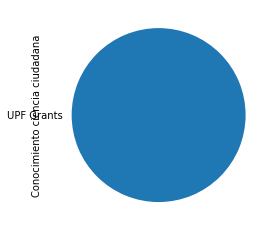

Tiene conocimientos de Conocimiento ciencia ciudadana: No

Edades filtradas: 51 - 60 años

Scientix              1
Máster profesorado    1
Name: taller, dtype: int64


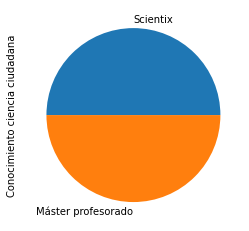

Tiene conocimientos de Conocimiento ODS: Si

Edades filtradas: 51 - 60 años

UPF Grants    3
Scientix      1
Name: taller, dtype: int64


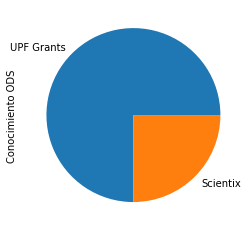

Tiene conocimientos de Conocimiento ODS: No

Edades filtradas: 51 - 60 años

Máster profesorado    1
Name: taller, dtype: int64


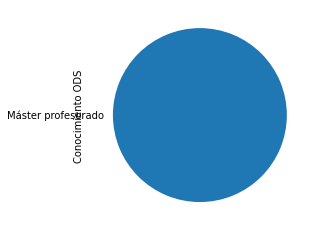

Tiene conocimientos de Conocimiento ciencia ciudadana: Si

Edades filtradas: 41 - 50 años

UPF Grants            5
Máster profesorado    2
Scientix              1
Name: taller, dtype: int64


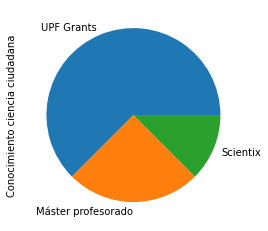

Tiene conocimientos de Conocimiento ciencia ciudadana: No

Edades filtradas: 41 - 50 años

Máster profesorado    5
UPF Grants            2
Scientix              1
Name: taller, dtype: int64


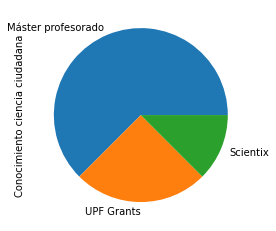

Tiene conocimientos de Conocimiento ODS: Si

Edades filtradas: 41 - 50 años

UPF Grants            5
Scientix              2
Máster profesorado    2
Name: taller, dtype: int64


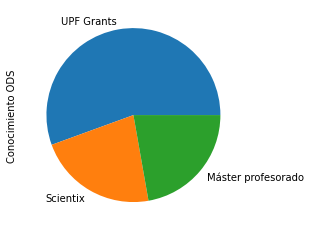

Tiene conocimientos de Conocimiento ODS: No

Edades filtradas: 41 - 50 años

Máster profesorado    5
UPF Grants            1
Name: taller, dtype: int64


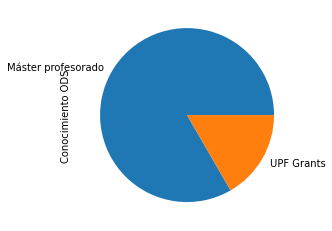

Tiene conocimientos de Conocimiento ciencia ciudadana: Si

Edades filtradas: 31 - 40 años

Máster profesorado    3
UPF Grants            2
Name: taller, dtype: int64


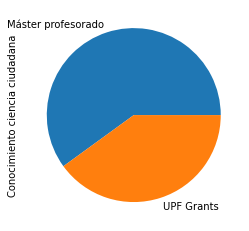

Tiene conocimientos de Conocimiento ciencia ciudadana: No

Edades filtradas: 31 - 40 años

Máster profesorado    6
UPF Grants            3
Scientix              1
Name: taller, dtype: int64


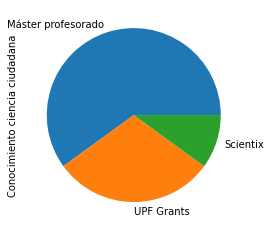

Tiene conocimientos de Conocimiento ODS: Si

Edades filtradas: 31 - 40 años

UPF Grants            3
Máster profesorado    2
Name: taller, dtype: int64


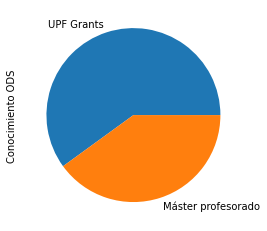

Tiene conocimientos de Conocimiento ODS: No

Edades filtradas: 31 - 40 años

Máster profesorado    7
UPF Grants            2
Scientix              1
Name: taller, dtype: int64


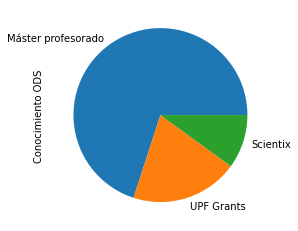

Tiene conocimientos de Conocimiento ciencia ciudadana: Si

Edades filtradas: 20 - 30 años

Máster profesorado    11
Scientix               1
UPF Grants             1
Name: taller, dtype: int64


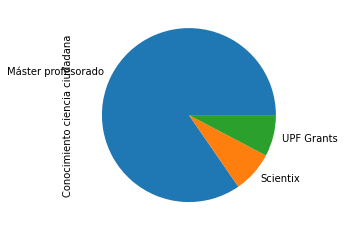

Tiene conocimientos de Conocimiento ciencia ciudadana: No

Edades filtradas: 20 - 30 años

Máster profesorado    20
UPF Grants             2
Name: taller, dtype: int64


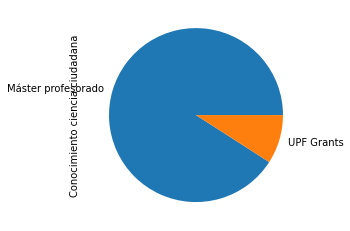

Tiene conocimientos de Conocimiento ODS: Si

Edades filtradas: 20 - 30 años

Máster profesorado    14
UPF Grants             2
Scientix               1
Name: taller, dtype: int64


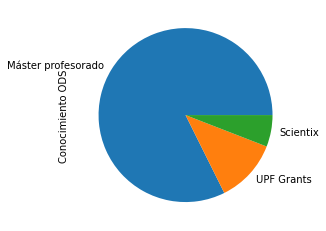

Tiene conocimientos de Conocimiento ODS: No

Edades filtradas: 20 - 30 años

Máster profesorado    17
UPF Grants             1
Name: taller, dtype: int64


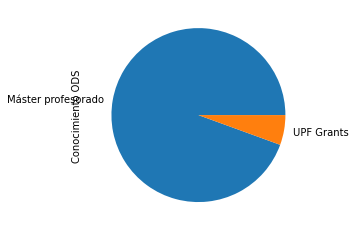

Tiene conocimientos de Conocimiento ciencia ciudadana: Si

Edades filtradas: NS / NC

Máster profesorado    1
Name: taller, dtype: int64


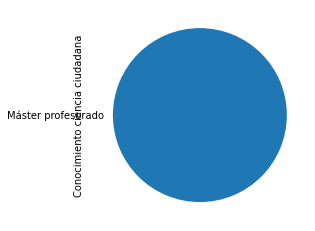

Tiene conocimientos de Conocimiento ciencia ciudadana: No

Edades filtradas: NS / NC

Series([], Name: taller, dtype: int64)


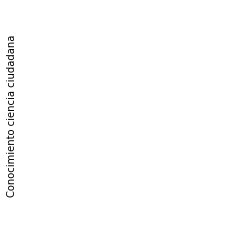

Tiene conocimientos de Conocimiento ODS: Si

Edades filtradas: NS / NC

Máster profesorado    1
Name: taller, dtype: int64


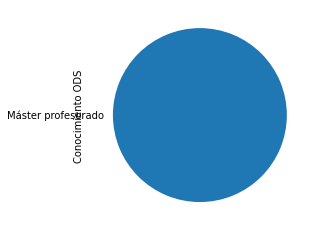

Tiene conocimientos de Conocimiento ODS: No

Edades filtradas: NS / NC

Series([], Name: taller, dtype: int64)


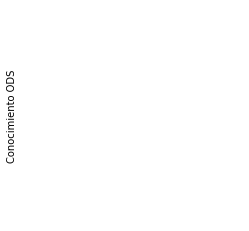

In [24]:
filtros = [
 'antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?',
 'antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?']

conocias = ['Si', 'No']


titulos_graficos = ['Conocimiento ciencia ciudadana', 'Conocimiento ODS']

cont = 0


for edad in df_encuestados['¿qué_edad_tienes?'].unique():
    cont = 0
    for col in filtros:
        for resp in conocias:
            df_aux = df_encuestados[(df_encuestados[col] == resp) & (df_encuestados['¿qué_edad_tienes?'] == edad)]
            print('Tiene conocimientos de ' + titulos_graficos[cont] + ': ' + resp + '\n')
            print('Edades filtradas: ' + edad + '\n')
            print(df_aux['taller'].value_counts())
            df_aux['taller'].value_counts().plot(kind='pie', ylabel=titulos_graficos[cont])
            plt.show()
            
        cont+=1
    
       


**Conocimiento ciencia ciudadana y Conocimiento ODS por edad**

Edades estudiadas: 51 - 60 años

Conocen ambos conceptos  7 participantes
No conocen ambos conceptos  3 participantes




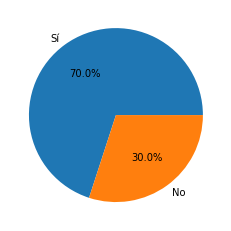

Edades estudiadas: 41 - 50 años

Conocen ambos conceptos  17 participantes
No conocen ambos conceptos  15 participantes




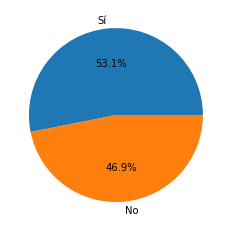

Edades estudiadas: 31 - 40 años

Conocen ambos conceptos  10 participantes
No conocen ambos conceptos  20 participantes




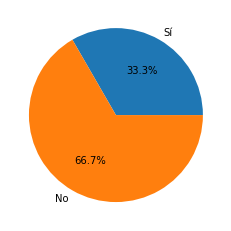

Edades estudiadas: 20 - 30 años

Conocen ambos conceptos  30 participantes
No conocen ambos conceptos  40 participantes




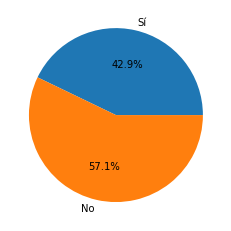

Edades estudiadas: NS / NC

Conocen ambos conceptos  2 participantes
No conocen ambos conceptos  0 participantes




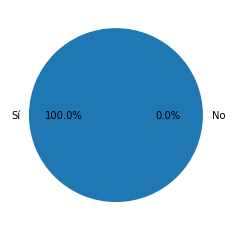

In [25]:
for edad in df_encuestados['¿qué_edad_tienes?'].unique():
    df_aux = df_encuestados[df_encuestados['¿qué_edad_tienes?'] == edad]
    cont_si_cc = len(df_aux[df_aux['antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?'] == 'Si'])
    cont_no_cc = len(df_aux) - cont_si_cc
    cont_si_ods = len(df_aux[df_aux['antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?'] == 'Si'])
    cont_no_ods = len(df_aux) - cont_si_ods
    
    print('Edades estudiadas: ' + edad + '\n')
    print('Conocen ambos conceptos  ' + str(cont_si_cc + cont_si_ods) + ' participantes')
    print('No conocen ambos conceptos  ' + str(cont_no_cc + cont_no_ods) + ' participantes')
    print('\n')
    
    fig, ax = plt.subplots()
    ax.pie([cont_si_cc + cont_si_ods, cont_no_cc + cont_no_ods], labels=["Sí", "No"], autopct='%1.1f%%')
    plt.show()

**Conocimiento ciencia ciudadana y Conocimiento ODS por taller por experiencia**

Tiene conocimientos de Conocimiento ciencia ciudadana: Si

Centro público                                   9
Particular                                       4
NS / NC                                          4
Particular y centro público                      4
Centro concertado                                4
Particular, centro público, centro concertado    2
Particular y universidad                         1
Centro público y extracurriculares               1
Universidad                                      1
Name: ¿tienes_experiencia_previa_enseñando?, dtype: int64


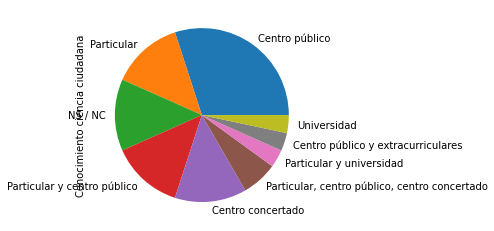

Tiene conocimientos de Conocimiento ciencia ciudadana: No

Particular                           14
Centro público                        8
NS / NC                               7
Centro concertado                     4
Universidad                           3
Sin experiencia                       2
Centro Privado y extracurricuales     1
Particular y universidad              1
Extracurriculares                     1
Particular y centro público           1
Name: ¿tienes_experiencia_previa_enseñando?, dtype: int64


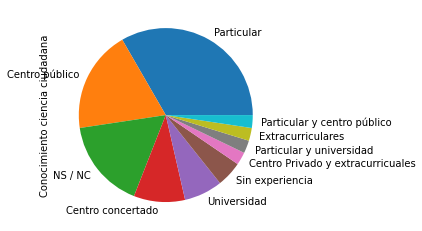

Tiene conocimientos de Conocimiento ODS: Si

Centro público                                   12
Particular                                        8
Particular y centro público                       4
Centro concertado                                 4
NS / NC                                           3
Sin experiencia                                   2
Centro público y extracurriculares                1
Particular, centro público, centro concertado     1
Particular y universidad                          1
Name: ¿tienes_experiencia_previa_enseñando?, dtype: int64


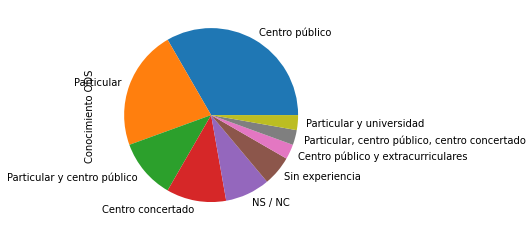

Tiene conocimientos de Conocimiento ODS: No

Particular                                       10
NS / NC                                           8
Centro público                                    5
Universidad                                       4
Centro concertado                                 3
Particular, centro público, centro concertado     1
Centro Privado y extracurricuales                 1
Particular y universidad                          1
Extracurriculares                                 1
Particular y centro público                       1
Name: ¿tienes_experiencia_previa_enseñando?, dtype: int64


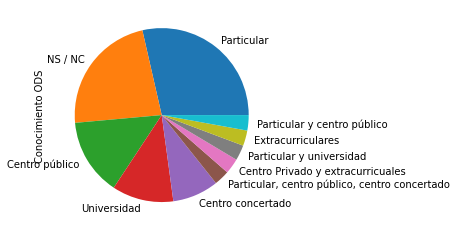

In [26]:
filtros = [
 'antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?',
 'antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?']

conocias = ['Si', 'No']

titulos_graficos = ['Conocimiento ciencia ciudadana', 'Conocimiento ODS']

cont = 0

for col in filtros:
    for resp in conocias:
        df_aux = df_encuestados[df_encuestados[col] == resp]
        print('Tiene conocimientos de ' + titulos_graficos[cont] + ': ' + resp + '\n')
        print(df_aux['¿tienes_experiencia_previa_enseñando?'].value_counts())
        df_aux['¿tienes_experiencia_previa_enseñando?'].value_counts().plot(kind='pie', ylabel=titulos_graficos[cont])
        plt.show()
    cont+= 1    


**Conocimiento ciencia ciudadana y Conocimiento ODS ambos o ninguno**

In [27]:
df_encuestados_conoc = df[['taller',
    'antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?',
 'antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?']]

df_encuestados_conoc_ = df_encuestados_conoc.rename({'antes_de_participar_en_el_taller,_¿sabías_qué_era_la_ciencia_ciudadana?':'ciencia_ciudadana',
                             'antes_de_participar_en_el_taller__¿sabías_qué_eran_los_objetivos_de_desarrollo_sostenible_(ods)?': 'ODS'}, axis = 1)

for tall in df_encuestados_conoc_.taller.unique():
    aux = df_encuestados_conoc_[df_encuestados_conoc_['taller'] == tall]
    total_si = len(aux[(aux['ciencia_ciudadana'] == 'Si') & (aux['ODS'] == 'Si')])
    total_no = len(aux[(aux['ciencia_ciudadana'] == 'No') & (aux['ODS'] == 'No')])

    print("El porcentaje de particapantes en el taller " + tall + " que conocen las dos o desconocen las dos es del " +  str("{:.2f}".format((total_si + total_no) / len(aux)*100)) + " %")


El porcentaje de particapantes en el taller UPF Grants que conocen las dos o desconocen las dos es del 72.22 %
El porcentaje de particapantes en el taller Scientix que conocen las dos o desconocen las dos es del 60.00 %
El porcentaje de particapantes en el taller Máster profesorado que conocen las dos o desconocen las dos es del 67.35 %


### 4.2 Análisis del cuestionario

Para empezar vemos cuantas respuestas tiene cada una de las cuestiones.

In [28]:
total_cuestiones_respondidas = df[num_variables]
total_cuestiones_respondidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 36 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   gráfico_sobre_las_temáticas_tratadas_en_ciencia_ciudadana                                       70 non-null     float64
 1   gráfico_sobre_las_herramientas_utilizadas_en_ciencia_ciudadana                                  70 non-null     float64
 2   mapa_regional,_nacional_o_europeo_con_los_proyectos_geolocalizados                              70 non-null     float64
 3   mapa_regional,_nacional_o_europeo_con_las_asociaciones_u_organizaciones_de_ciencia_ciudadana    70 non-null     float64
 4   gráficos_con_datos_reales_sobre_diferentes_problemáticas_reales                                 69 non-null     float64
 5   título_del_proyec

A continuación mostramos la matriz de correlación de las variables. Nos puede llegar a ayudar a identificar que objetos visuales se pueden poner en la misma pestaña o más cercanos ya que tienen una puntuación pareja. 

,gráfico_sobre_las_temáticas_tratadas_en_ciencia_ciudadana,gráfico_sobre_las_herramientas_utilizadas_en_ciencia_ciudadana,"mapa_regional,_nacional_o_europeo_con_los_proyectos_geolocalizados","mapa_regional,_nacional_o_europeo_con_las_asociaciones_u_organizaciones_de_ciencia_ciudadana",gráficos_con_datos_reales_sobre_diferentes_problemáticas_reales,título_del_proyecto,descripción_del_proyecto,logo_del_proyecto,web_del_proyecto,datos_y/o_explicación_sobre_la_temática_tratada,información_sobre_el/los_lugares_dónde_se_lleva_a_cabo_el_proyecto,información_técnica_sobre_la_investigación_que_los_científicos_llevan_a_cabo_(ej._metodología),herramientas_utilizadas,temática_o_campo_de_investigación_del_proyecto,tareas_o_formas_de_participación_de_los_voluntarios,impacto_del_proyecto,recursos_adicionales_(educativos_o_no),redes_sociales,estado_del_proyecto,"información_adicional_(ej._noticias,_artículos_científicos,_etc…)",objetivos_de_aprendizaje_al_participar_en_el_proyecto,duración_de_las_tareas_o_de_la_participación_(si_fueran_varias),duración_del_proyecto,"requisitos_para_participar,_si_los_hubiera_(ej._conocimiento_previo)",objetivos_de_aprendizaje,título_de_la_actividad,descripción_de_la_actividad,metodología_utilizada,duración_de_la_actividad,evaluación_de_la_actividad,motivación_a_participar_o_durante_la_actividad,cómo_involucrar_a_la_comunidad_educativa_a_participar_en_la_actividad,ámbito_en_el_que_se_desarrolla_la_actividad,resultados_de_la_actividad,herramientas_a_utilizar,contenido_curricular
gráfico_sobre_las_temáticas_tratadas_en_ciencia_ciudadana,1.000000,0.617745,0.267190,0.263392,0.270272,0.485242,0.168889,0.376089,-0.006434,0.381892,0.359548,0.228271,0.285075,0.376764,0.097398,0.293519,0.429776,0.261483,0.393088,0.221588,3.707535e-01,0.309626,0.355190,0.371312,0.076690,0.444727,1.140360e-01,0.018427,-0.001001,0.208001,0.620260,0.113608,0.518811,0.153921,-0.018526,-0.099677
gráfico_sobre_las_herramientas_utilizadas_en_ciencia_ciudadana,0.617745,1.000000,0.217695,0.187168,0.112036,0.309613,0.074056,0.203285,0.002170,0.113994,0.259428,0.261093,0.322251,0.342787,0.188357,0.345733,0.327011,0.148138,0.354652,0.141445,2.396956e-01,0.189068,0.273448,0.289475,0.005997,0.156258,-2.272567e-02,0.003650,0.077628,0.071494,0.208152,0.005534,0.339531,0.055159,-0.186871,-0.104926
"mapa_regional,_nacional_o_europeo_con_los_proyectos_geolocalizados",0.267190,0.217695,1.000000,0.815855,0.398229,0.470765,0.257464,0.360861,0.307208,0.342946,0.546986,0.171783,0.340255,0.452761,0.285003,0.413949,0.422406,0.309212,0.535110,0.505043,5.063526e-01,0.499380,0.485919,0.519506,0.469057,-0.063709,9.994368e-02,-0.058100,-0.113598,0.121495,0.362541,0.162742,0.092114,-0.012542,0.296282,0.356406
"mapa_regional,_nacional_o_europeo_con_las_asociaciones_u_organizaciones_de_ciencia_ciudadana",0.263392,0.187168,0.815855,1.000000,0.288714,0.491616,0.361219,0.403081,0.425297,0.329217,0.560369,0.186200,0.373876,0.501963,0.382716,0.344676,0.458631,0.387277,0.541640,0.575966,6.202071e-01,0.467671,0.489711,0.580896,0.157039,-0.083583,-1.972734e-01,-0.226496,-0.182866,-0.083790,0.274945,0.017538,0.142899,0.033735,0.079959,0.186579
gráficos_con_datos_reales_sobre_diferentes_problemáticas_reales,0.270272,0.112036,0.398229,0.288714,1.000000,0.354389,0.199892,0.258098,0.170969,0.464457,0.369218,0.145850,0.178850,0.258161,0.298367,0.467180,0.197965,0.297802,0.328233,0.182985,3.960405e-01,0.391550,0.310284,0.377223,0.622261,0.322741,3.386105e-01,0.307948,0.361534,0.409505,0.472778,0.627929,0.358573,0.327674,0.553326,0.201131
título_del_proyecto,0.485242,0.309613,0.470765,0.491616,0.354389,1.000000,0.521598,0.421408,0.254855,0.525317,0.551770,0.436034,0.556623,0.441134,0.384995,0.494503,0.464384,0.475414,0.551664,0.464844,4.536143e-01,0.419053,0.507737,0.530601,0.349630,0.615156,1.673186e-01,0.192342,0.273723,0.346981,0.300969,0.229499,0.284328,0.404796,0.424908,0.085652
descripción_del_proyecto,0.168889,0.074056,0.257464,0.361219,0.199892,0.521598,1.000000,0.232254,0.2865

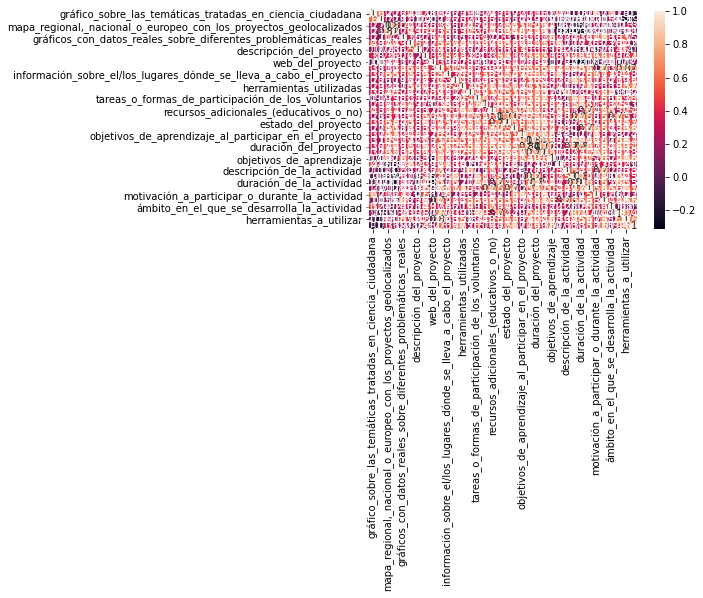

In [29]:
corrMatrix = df.corr()
display(corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

Veremos un análisis global de todas las cuestiones con su histograma correspondiente. 

**Resultados totales (de 1 a 10)** 

La nota media es 6.734693877551021

La mediana es 7.142857142857143



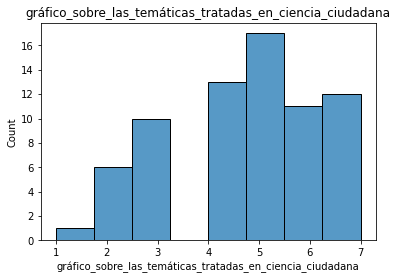

La nota media es 6.9183673469387745

La mediana es 7.142857142857143



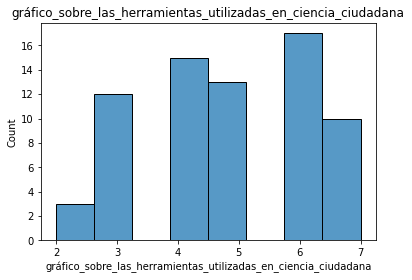

La nota media es 6.0

La mediana es 5.714285714285714



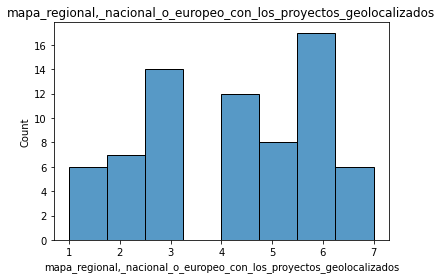

La nota media es 6.346938775510204

La mediana es 7.142857142857143



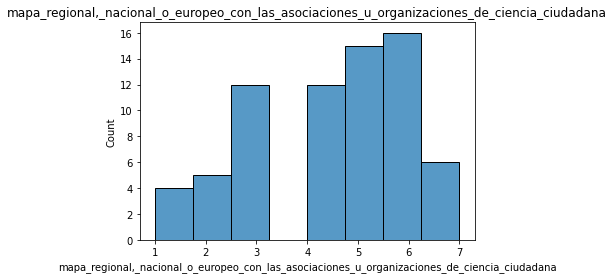

La nota media es 7.142857142857143

La mediana es 7.142857142857143



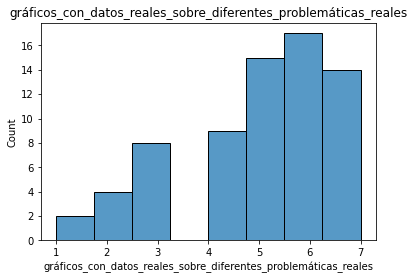

La nota media es 6.961770623742455

La mediana es 7.142857142857143



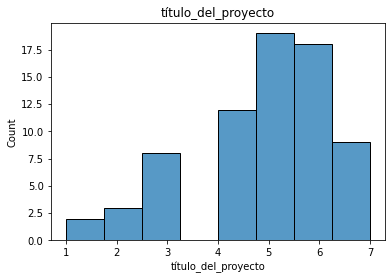

La nota media es 8.061224489795919

La mediana es 8.571428571428571



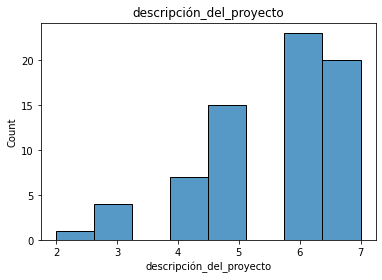

La nota media es 4.849094567404427

La mediana es 4.285714285714286



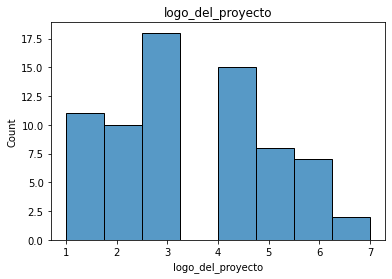

La nota media es 7.267080745341616

La mediana es 7.142857142857143



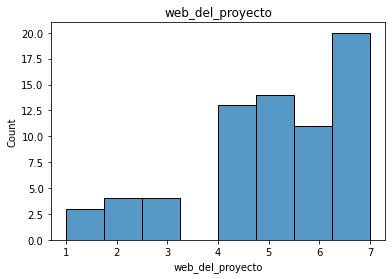

La nota media es 7.515527950310559

La mediana es 8.571428571428571



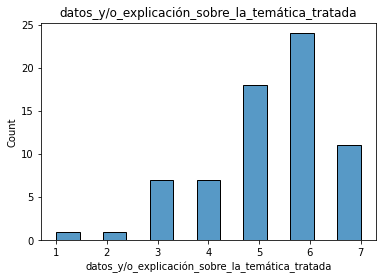

La nota media es 6.780684104627767

La mediana es 7.142857142857143



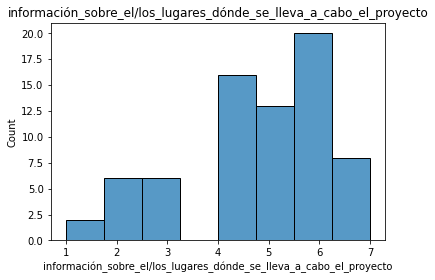

La nota media es 7.2434607645875255

La mediana es 7.142857142857143



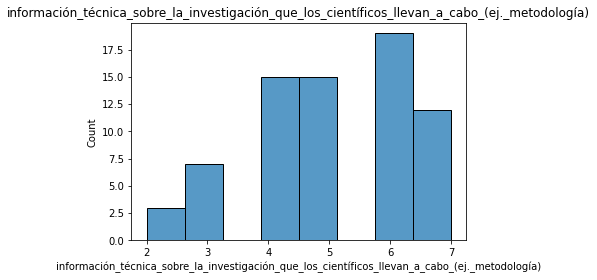

La nota media es 6.884920634920634

La mediana es 7.142857142857143



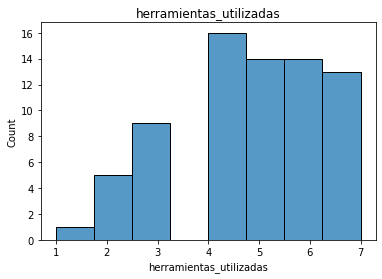

La nota media es 6.734693877551021

La mediana es 7.142857142857143



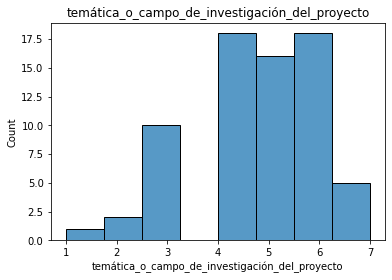

La nota media es 7.6861167002012065

La mediana es 8.571428571428571



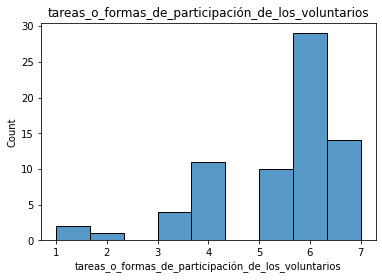

La nota media es 6.82092555331992

La mediana es 7.142857142857143



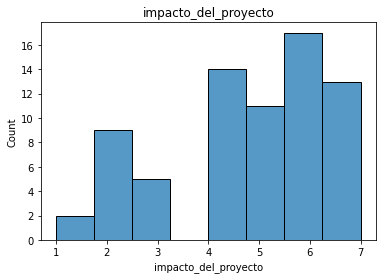

La nota media es 6.252587991718427

La mediana es 5.714285714285714



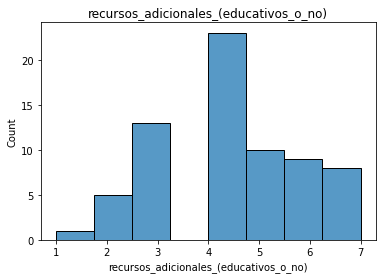

La nota media es 6.016096579476861

La mediana es 5.714285714285714



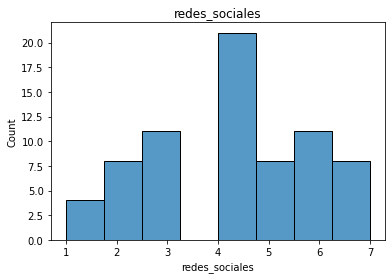

La nota media es 6.07645875251509

La mediana es 5.714285714285714



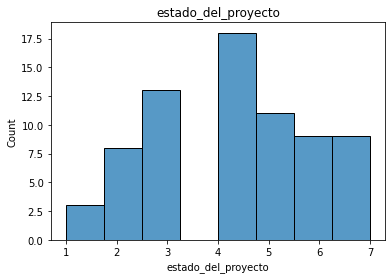

La nota media es 5.776397515527951

La mediana es 5.714285714285714



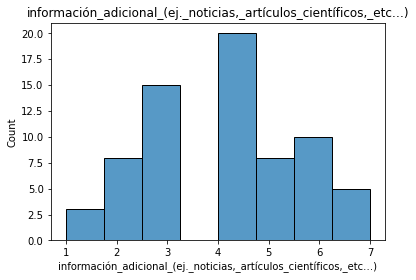

La nota media es 7.625754527162978

La mediana es 8.571428571428571



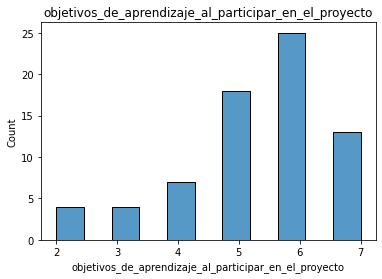

La nota media es 6.619718309859154

La mediana es 7.142857142857143



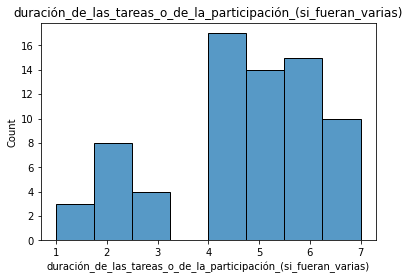

La nota media es 6.498993963782696

La mediana es 7.142857142857143



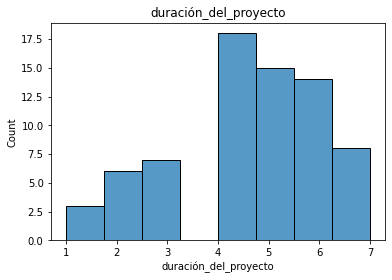

La nota media es 7.16297786720322

La mediana es 7.142857142857143



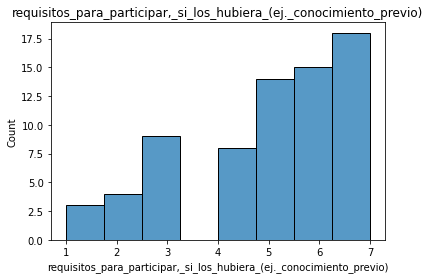

La nota media es 8.198757763975156

La mediana es 8.571428571428571



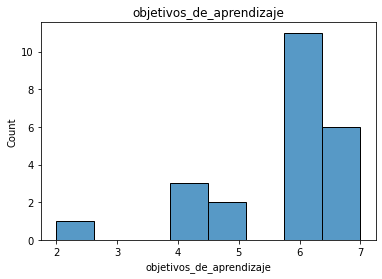

La nota media es 8.509316770186334

La mediana es 8.571428571428571



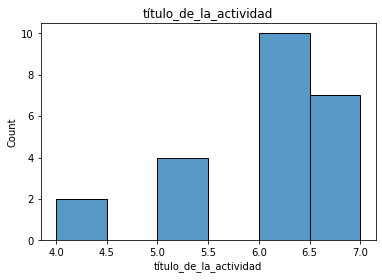

La nota media es 9.285714285714286

La mediana es 10.0



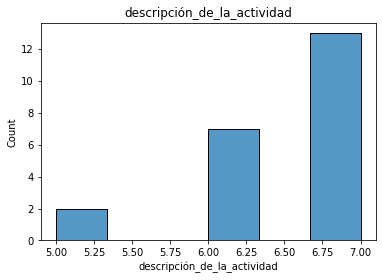

La nota media es 8.322981366459627

La mediana es 8.571428571428571



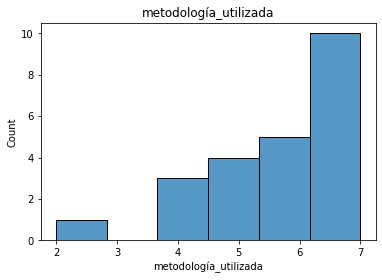

La nota media es 8.116883116883116

La mediana es 8.571428571428571



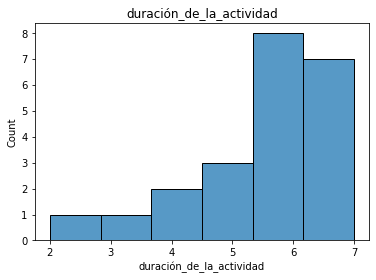

La nota media es 8.136645962732919

La mediana es 8.571428571428571



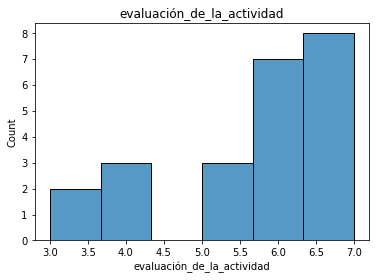

La nota media es 7.515527950310559

La mediana es 8.571428571428571



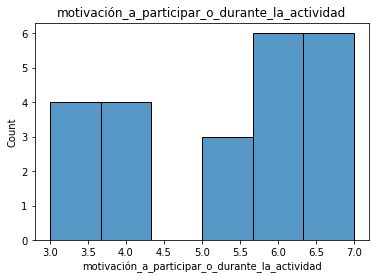

La nota media es 8.198757763975156

La mediana es 8.571428571428571



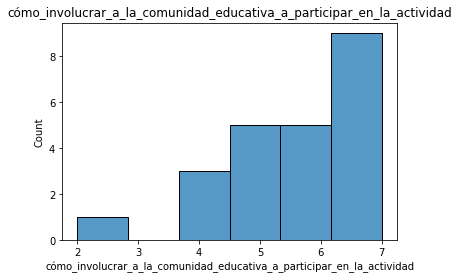

La nota media es 7.453416149068324

La mediana es 7.142857142857143



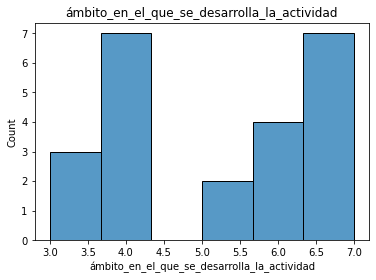

La nota media es 8.385093167701864

La mediana es 8.571428571428571



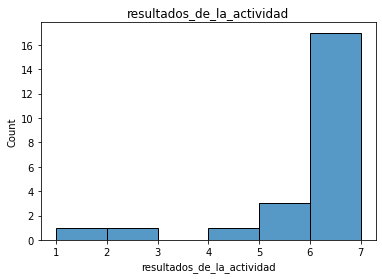

La nota media es 8.506493506493506

La mediana es 8.571428571428571



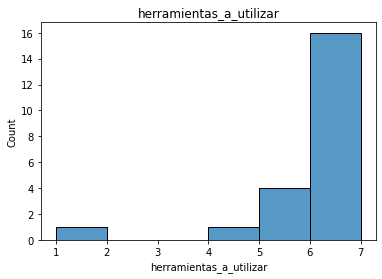

La nota media es 7.987012987012987

La mediana es 8.571428571428571



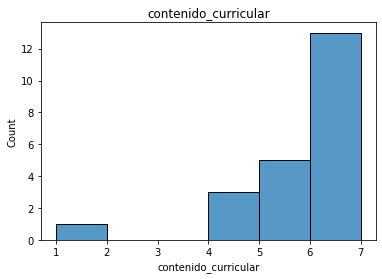

9.285714285714286


In [30]:
max_mean = []
medians = []

for col in num_variables:
        mean = (df[col].mean()*10/ 7)
        median = (df[col].median() * 10/7) 
        print('La nota media es ' + str(mean) + '\n')
        print('La mediana es ' + str(median) + '\n')
        plt.title(col)
        sns.histplot(df[col])
        plt.show()

        max_mean.append(mean)
        medians.append(median)

print(max(max_mean))

In [31]:
means_preguntas = pd.DataFrame([num_variables, max_mean, medians]).T
means_preguntas_ = means_preguntas.rename({0:'Preguntas', 1:'Puntuacion_Media', 2:'Mediana'}, axis = 1)
means_preguntas__ = means_preguntas_.set_index('Preguntas')
means_preguntas_sort = means_preguntas__.sort_values('Puntuacion_Media',ascending=False)

Separamos en tres grupos: 

- **Gráficos**

- **Actividades**

- **Proyectos**

#### 4.2.1 Gráficos

La parte de los gráficos los podríamos encontrar en la home page o en alguna página que muestre las estadísticas de los proyectos. Puede ser tipo de proyecto, origen, idioma...

In [32]:
Pagina_Principal = ['gráfico_sobre_las_temáticas_tratadas_en_ciencia_ciudadana',
 'gráfico_sobre_las_herramientas_utilizadas_en_ciencia_ciudadana',
 'mapa_regional,_nacional_o_europeo_con_los_proyectos_geolocalizados',
 'mapa_regional,_nacional_o_europeo_con_las_asociaciones_u_organizaciones_de_ciencia_ciudadana',
 'gráficos_con_datos_reales_sobre_diferentes_problemáticas_reales'
]

RespuestasPrincipal = means_preguntas_[means_preguntas_['Preguntas'].isin(Pagina_Principal)]
RespuestasPrincipal_ = RespuestasPrincipal.set_index('Preguntas')
RespuestasPrincipal__ = RespuestasPrincipal_.sort_values('Puntuacion_Media',ascending=False)
RespuestasPrincipal__

,Puntuacion_Media,Mediana
Preguntas,,
gráficos_con_datos_reales_sobre_diferentes_problemáticas_reales,7.142857,7.142857
gráfico_sobre_las_herramientas_utilizadas_en_ciencia_ciudadana,6.918367,7.142857
gráfico_sobre_las_temáticas_tratadas_en_ciencia_ciudadana,6.734694,7.142857
"mapa_regional,_nacional_o_europeo_con_las_asociaciones_u_organizaciones_de_ciencia_ciudadana",6.346939,7.142857
"mapa_regional,_nacional_o_europeo_con_los_proyectos_geolocalizados",6.0,5.714286


#### 4.2.2 Actividades

Son las actividades que hayan podido crear los tutores a partir de la visualizaciones. Otros tutores las podrán poner en marcha para ayudarles.

In [33]:
Actividad = ['título_de_la_actividad',
 'descripción_de_la_actividad',
 'metodología_utilizada',
 'duración_de_la_actividad',
 'evaluación_de_la_actividad',
 'motivación_a_participar_o_durante_la_actividad',
 'cómo_involucrar_a_la_comunidad_educativa_a_participar_en_la_actividad',
 'ámbito_en_el_que_se_desarrolla_la_actividad',
 'resultados_de_la_actividad',
 'herramientas_a_utilizar',
 'contenido_curricular']

RespuestasActividades = means_preguntas_[means_preguntas_['Preguntas'].isin(Actividad)]
RespuestasActividades_ = RespuestasActividades.set_index('Preguntas')
RespuestasActividades__ = RespuestasActividades_.sort_values('Puntuacion_Media',ascending=False)
RespuestasActividades__

,Puntuacion_Media,Mediana
Preguntas,,
descripción_de_la_actividad,9.285714,10.0
título_de_la_actividad,8.509317,8.571429
herramientas_a_utilizar,8.506494,8.571429
resultados_de_la_actividad,8.385093,8.571429
metodología_utilizada,8.322981,8.571429
cómo_involucrar_a_la_comunidad_educativa_a_participar_en_la_actividad,8.198758,8.571429
evaluación_de_la_actividad,8.136646,8.571429
duración_de_la_actividad,8.116883,8.571429
contenido_curricular,7.987013,8.571429


#### 4.2.3 Proyectos

Son los proyectos que encontramos dentro de la base de datos recogidos con el scrapper. Se pueden utilizar para coger ideas y crear actividades

In [34]:
 Proyecto = ['título_del_proyecto',
 'descripción_del_proyecto',
 'logo_del_proyecto',
 'web_del_proyecto',
 'datos_y/o_explicación_sobre_la_temática_tratada',
 'información_sobre_el/los_lugares_dónde_se_lleva_a_cabo_el_proyecto',
 'información_técnica_sobre_la_investigación_que_los_científicos_llevan_a_cabo_(ej._metodología)',
 'herramientas_utilizadas',
 'temática_o_campo_de_investigación_del_proyecto',
 'tareas_o_formas_de_participación_de_los_voluntarios',
 'impacto_del_proyecto',
 'recursos_adicionales_(educativos_o_no)',
 'redes_sociales',
 'estado_del_proyecto',
 'información_adicional_(ej._noticias,_artículos_científicos,_etc…)',
 'objetivos_de_aprendizaje_al_participar_en_el_proyecto',
 'duración_de_las_tareas_o_de_la_participación_(si_fueran_varias)',
 'duración_del_proyecto',
 'requisitos_para_participar,_si_los_hubiera_(ej._conocimiento_previo)',
 'objetivos_de_aprendizaje']


RespuestasProyectos = means_preguntas_[means_preguntas_['Preguntas'].isin(Proyecto)]
RespuestasProyectos_ = RespuestasProyectos.set_index('Preguntas')
RespuestasProyectos__ = RespuestasProyectos_.sort_values('Puntuacion_Media',ascending=False)
RespuestasProyectos__

,Puntuacion_Media,Mediana
Preguntas,,
objetivos_de_aprendizaje,8.198758,8.571429
descripción_del_proyecto,8.061224,8.571429
tareas_o_formas_de_participación_de_los_voluntarios,7.686117,8.571429
objetivos_de_aprendizaje_al_participar_en_el_proyecto,7.625755,8.571429
datos_y/o_explicación_sobre_la_temática_tratada,7.515528,8.571429
web_del_proyecto,7.267081,7.142857
información_técnica_sobre_la_investigación_que_los_científicos_llevan_a_cabo_(ej._metodología),7.243461,7.142857
"requisitos_para_participar,_si_los_hubiera_(ej._conocimiento_previo)",7.162978,7.142857
título_del_proyecto,6.961771,7.142857


#### 2.2.4 Otros

Mostraremos a continuación el resultado de las cuestiones por edad, taller y experiencia

#### Edad

In [35]:
num_variables.append('¿qué_edad_tienes?')
df_num = df[num_variables]
#filtramos por aquellos que si han seleccionado por un rango de edad
df_num = df_num[df_num['¿qué_edad_tienes?'] != 'NS / NC']
df_num_filtered_edad = df_num.groupby('¿qué_edad_tienes?').agg('mean')
df_num_filtered_edad = (df_num_filtered_edad * 10) / 7

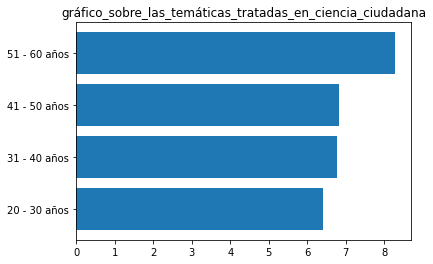

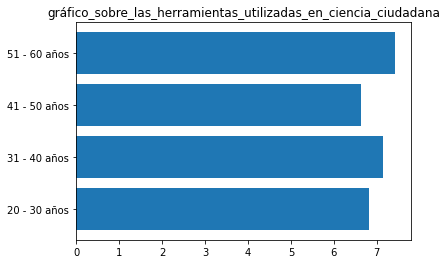

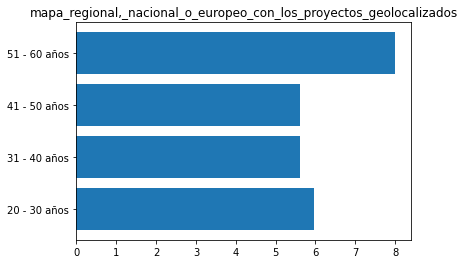

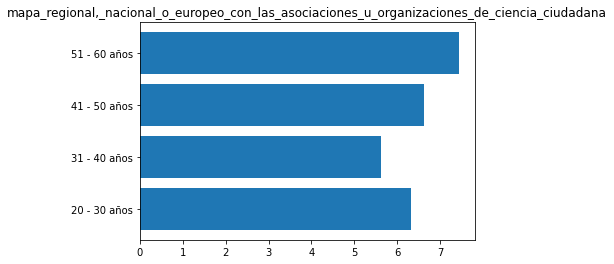

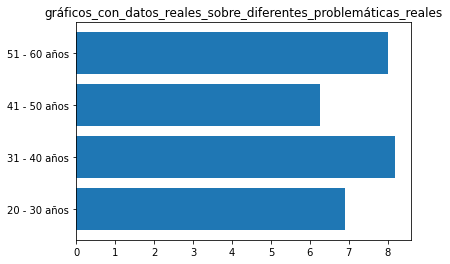

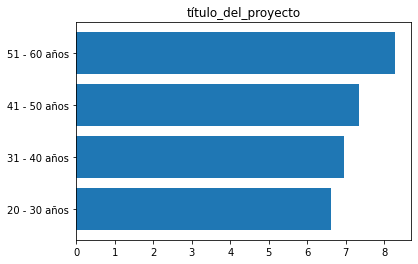

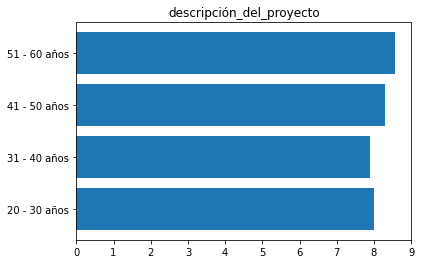

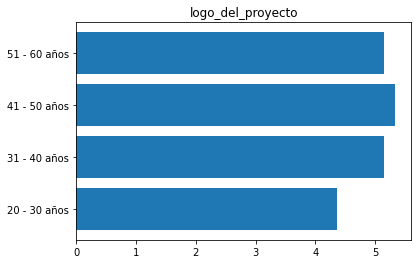

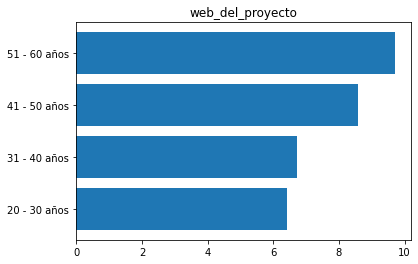

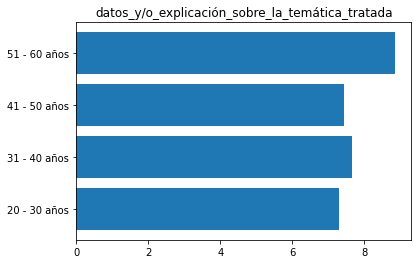

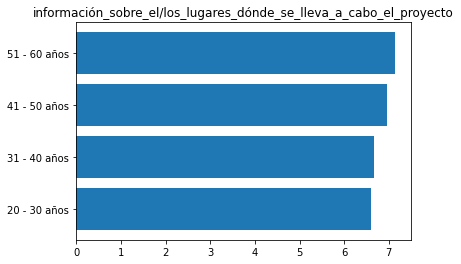

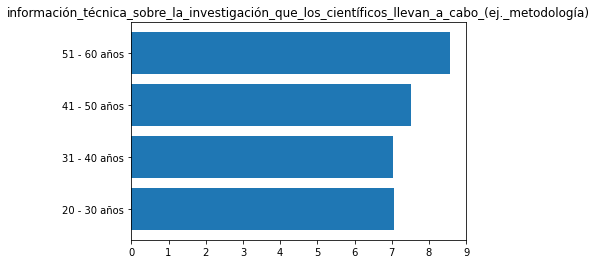

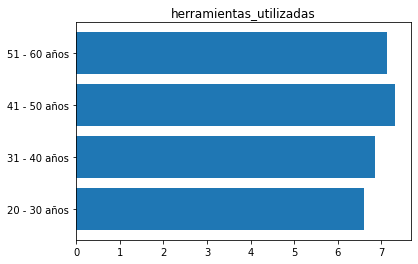

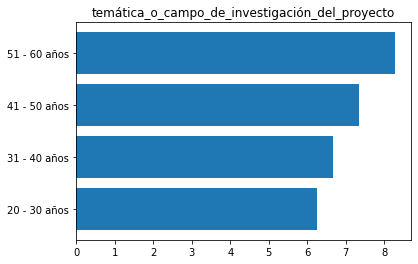

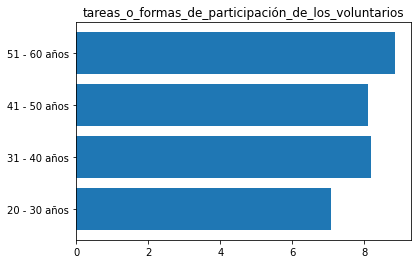

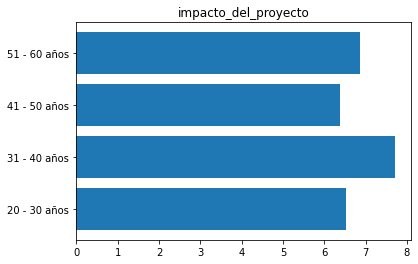

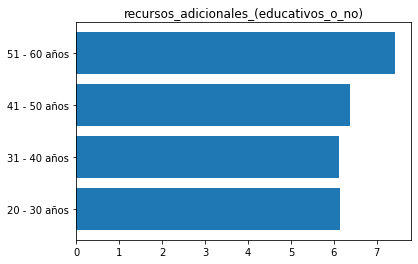

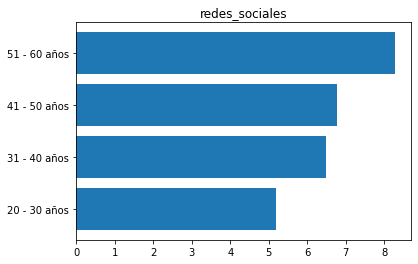

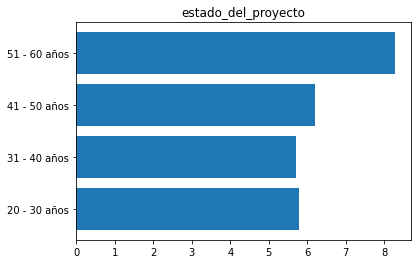

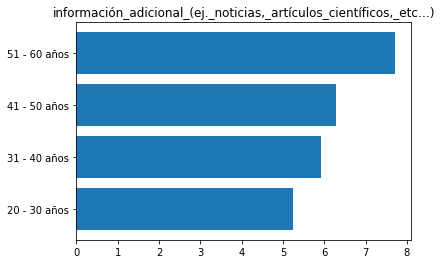

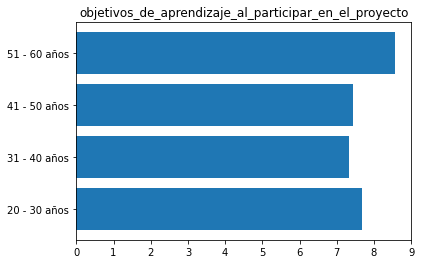

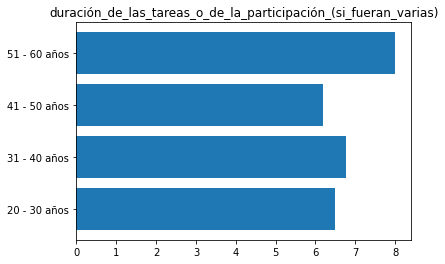

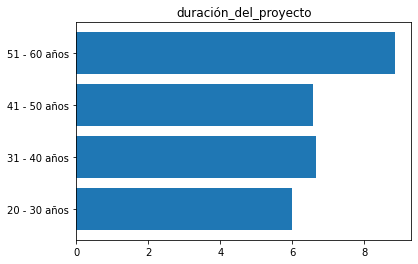

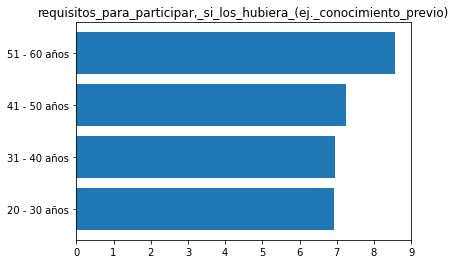

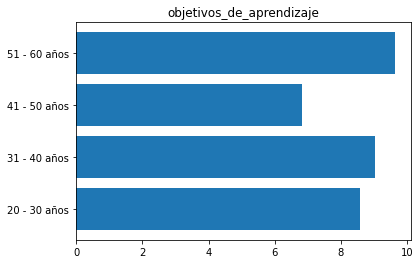

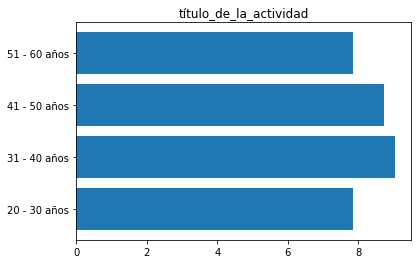

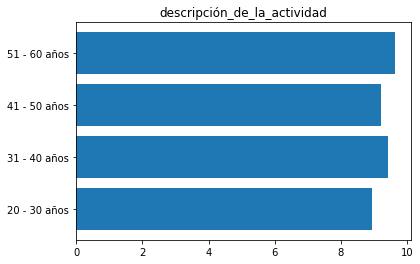

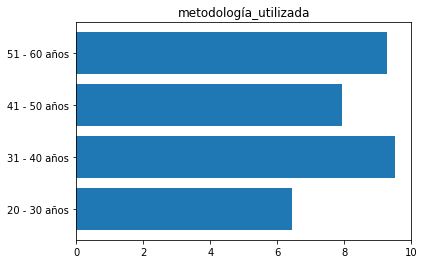

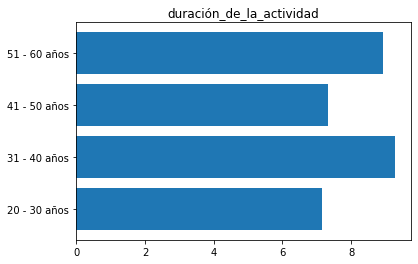

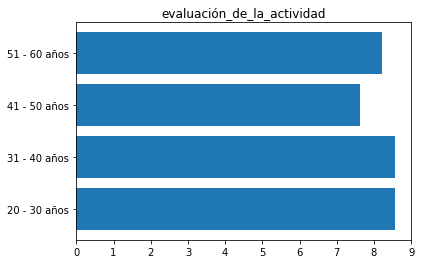

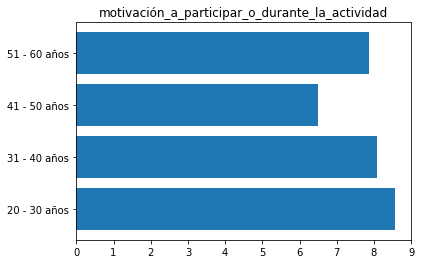

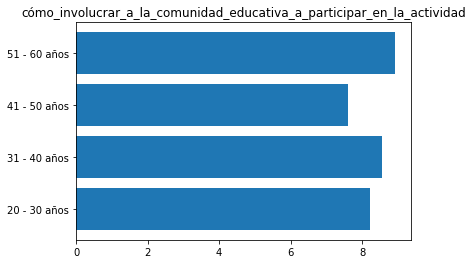

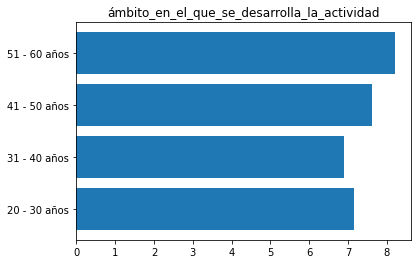

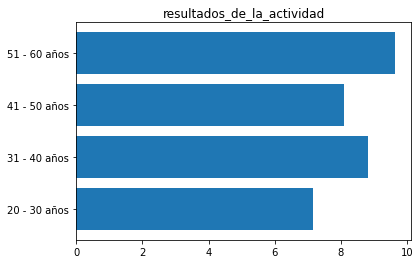

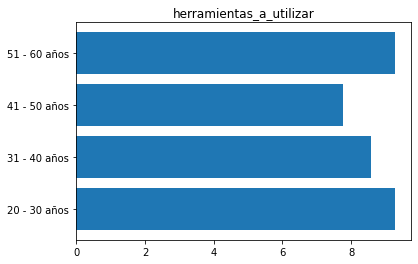

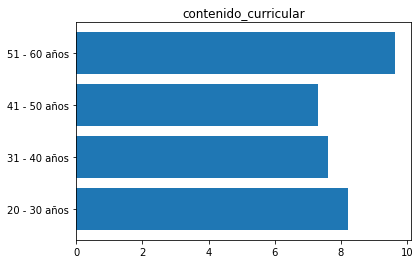

In [36]:
for col in df_num_filtered_edad.columns:
    if col in Actividad + Proyecto + Pagina_Principal:
        fig, ax = plt.subplots()
        ax.barh(df_num_filtered_edad.index,df_num_filtered_edad[col])
        plt.title(col)
        plt.show()


In [37]:
num_variables.remove('¿qué_edad_tienes?')

#### Taller

In [38]:
num_variables.append('taller')
df_taller = df[num_variables]
df_taller_agg = df_taller.groupby('taller').agg('mean')
df_taller_agg = (df_taller_agg * 10) / 7

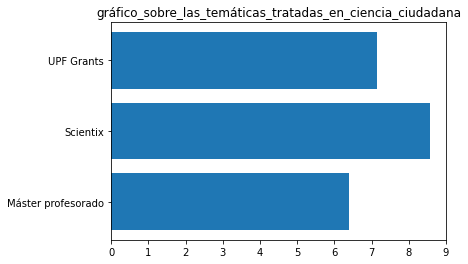

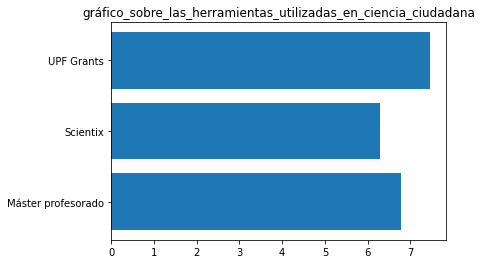

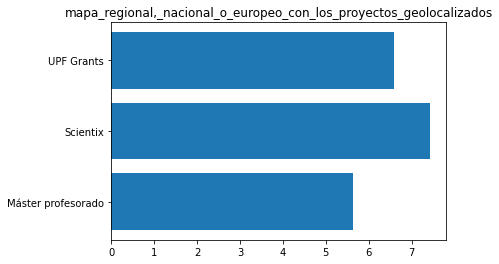

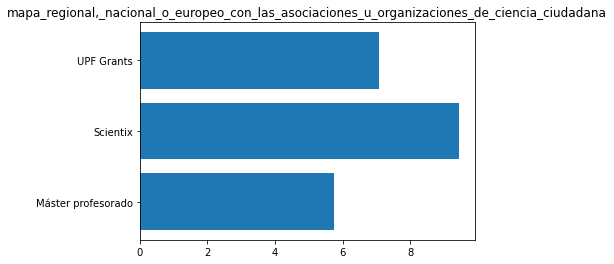

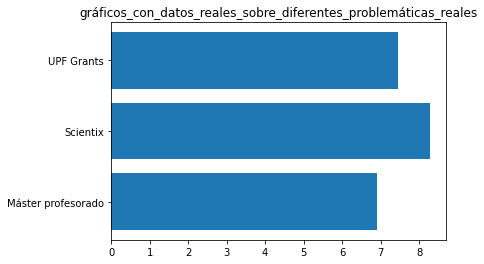

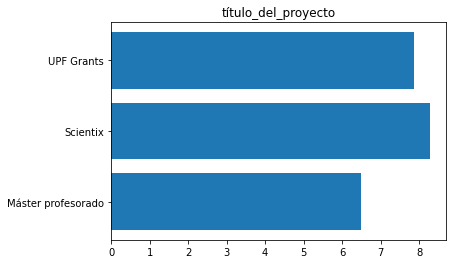

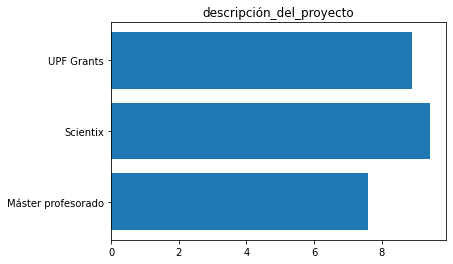

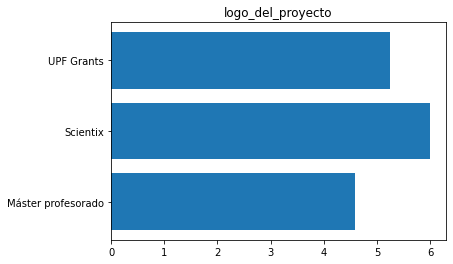

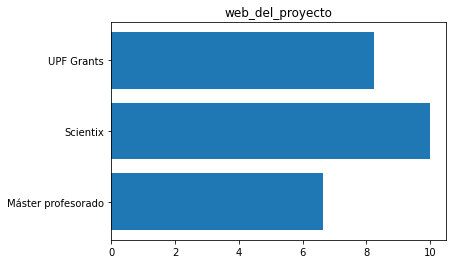

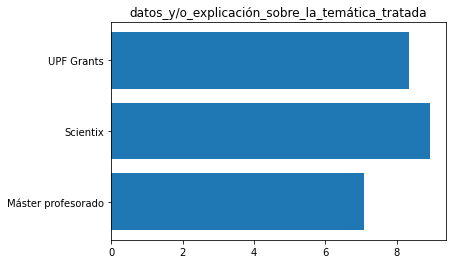

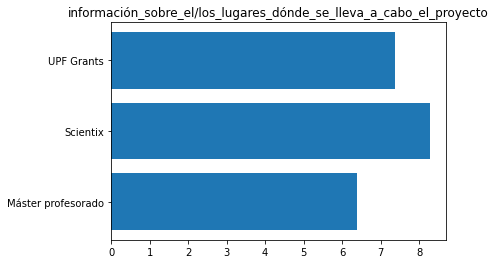

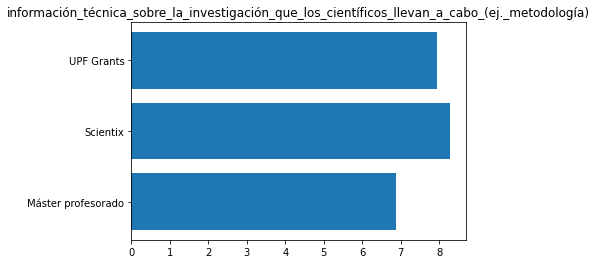

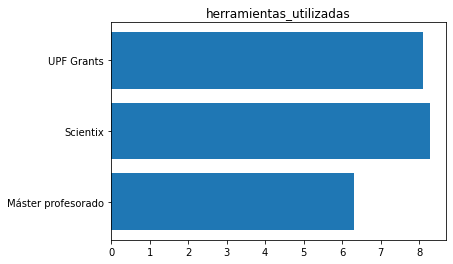

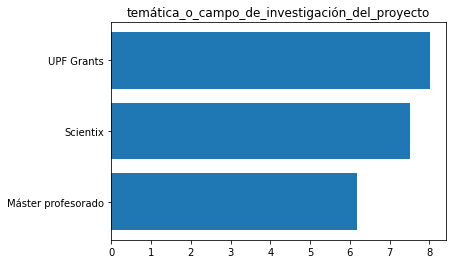

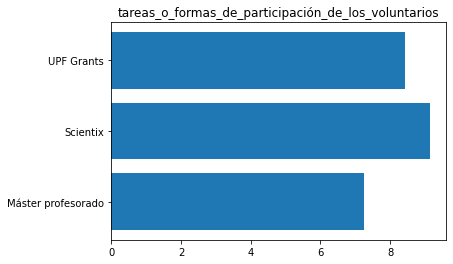

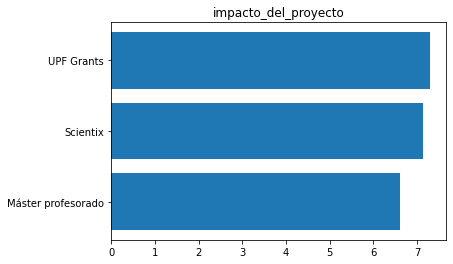

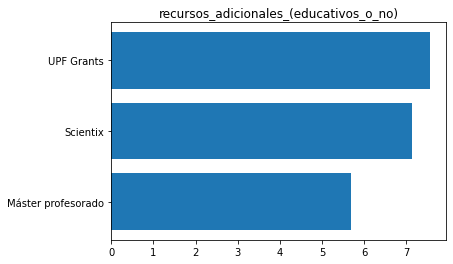

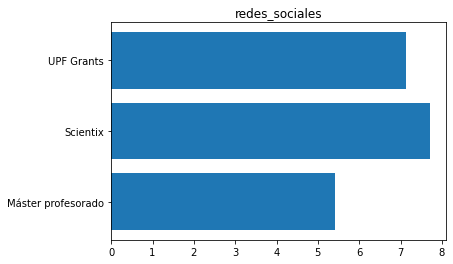

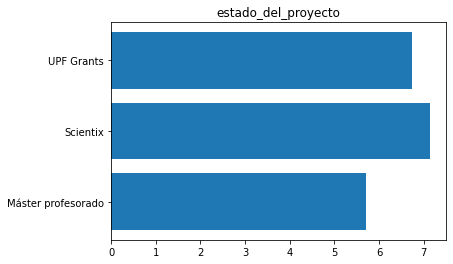

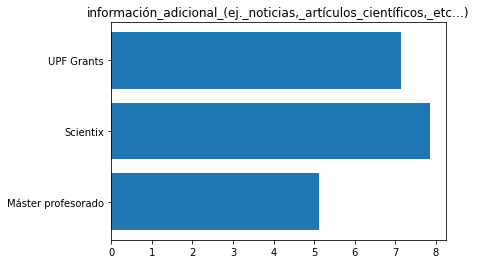

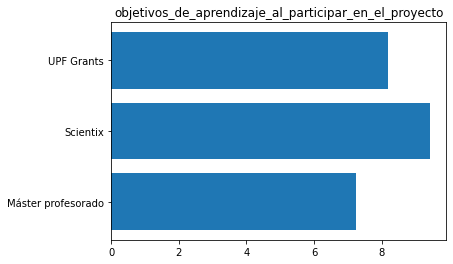

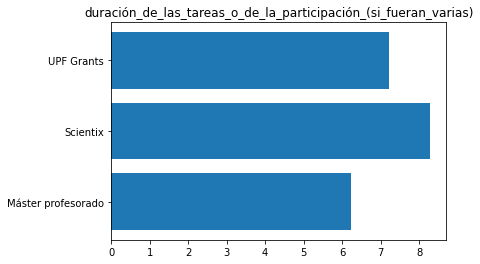

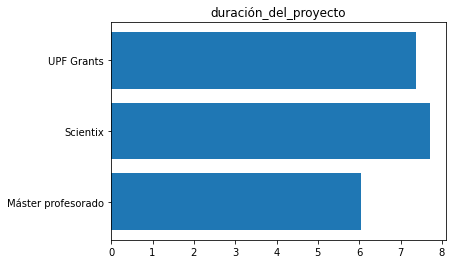

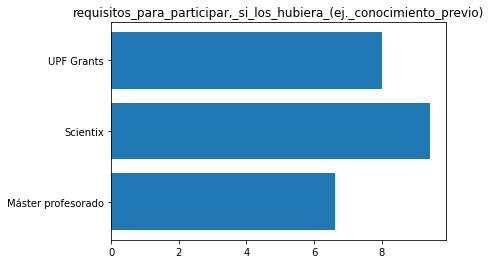

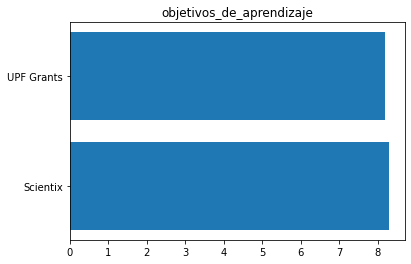

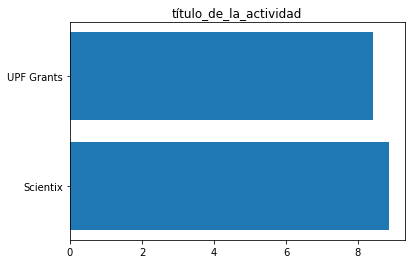

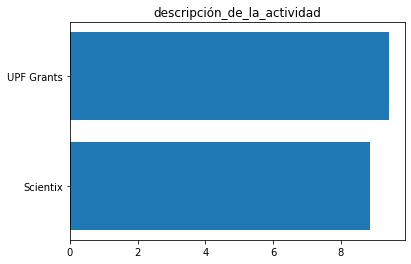

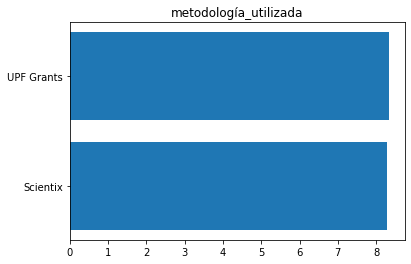

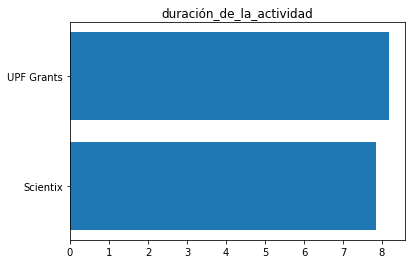

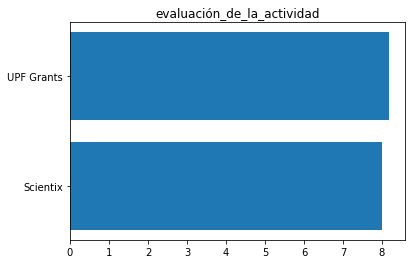

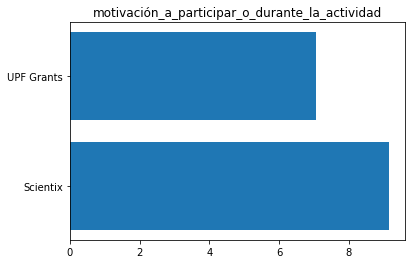

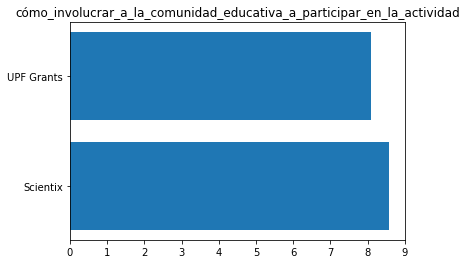

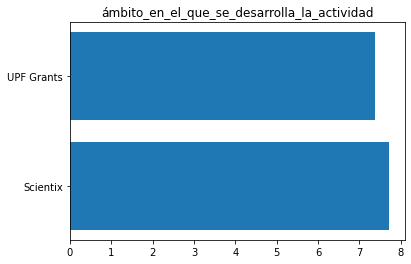

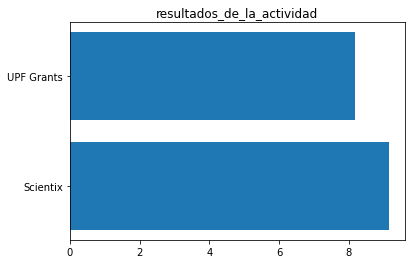

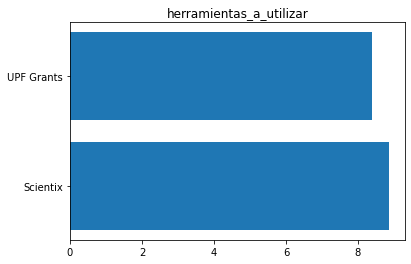

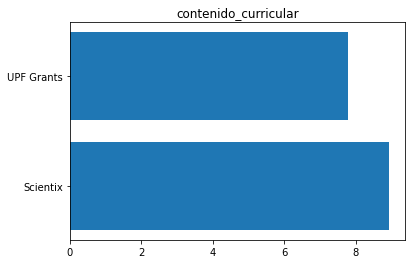

In [39]:
for col in df_taller_agg.columns:
    #filtramos con los que tienen la media mas alta que 8
    if col in Actividad + Proyecto + Pagina_Principal:
        fig, ax = plt.subplots()
        ax.barh(df_taller_agg.index,df_taller_agg[col])
        plt.title(col)
        plt.show()

In [40]:
num_variables.remove('taller')

#### Experiencia

In [41]:
num_variables.append('¿tienes_experiencia_previa_enseñando?')
df_experiencia = df[num_variables]
df_experiencia_agg = df_experiencia.groupby('¿tienes_experiencia_previa_enseñando?').agg('mean')
df_experiencia_agg = (df_experiencia_agg * 10) / 7

gráfico_sobre_las_temáticas_tratadas_en_ciencia_ciudadana


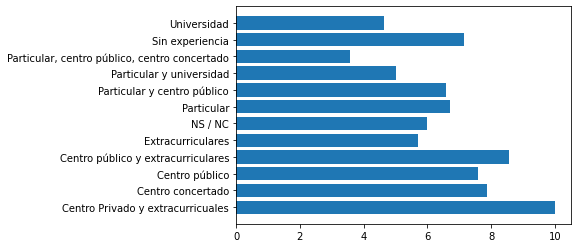

gráfico_sobre_las_herramientas_utilizadas_en_ciencia_ciudadana


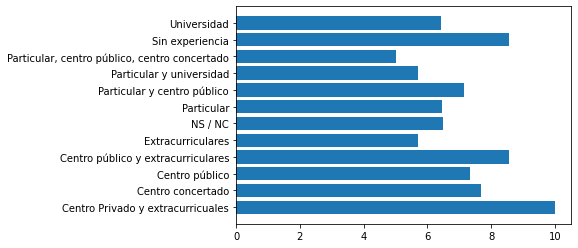

mapa_regional,_nacional_o_europeo_con_los_proyectos_geolocalizados


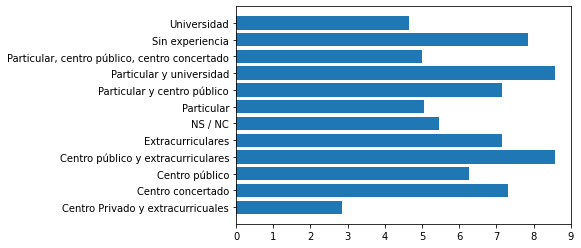

mapa_regional,_nacional_o_europeo_con_las_asociaciones_u_organizaciones_de_ciencia_ciudadana


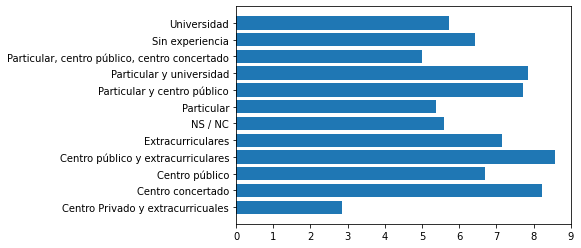

gráficos_con_datos_reales_sobre_diferentes_problemáticas_reales


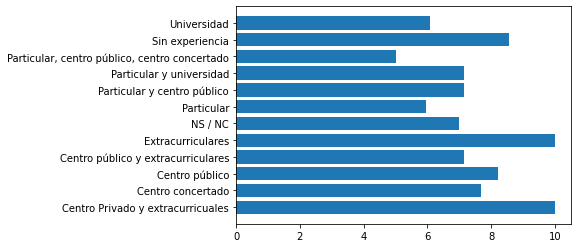

título_del_proyecto


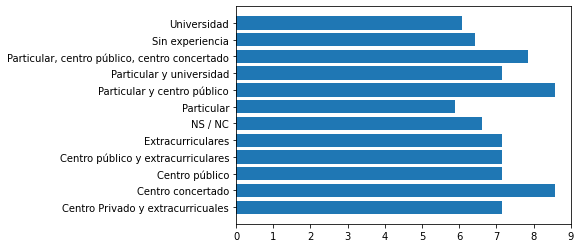

descripción_del_proyecto


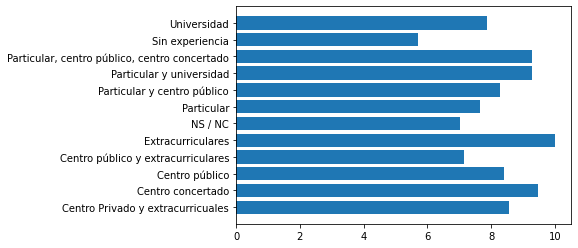

logo_del_proyecto


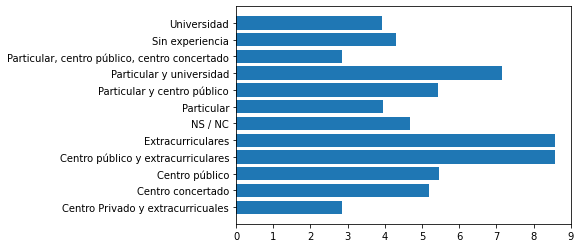

web_del_proyecto


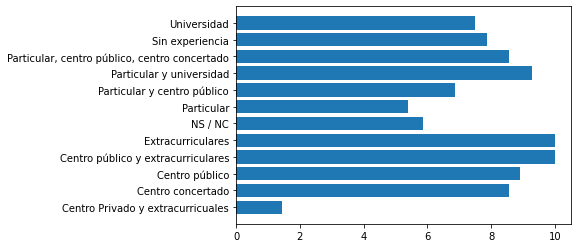

datos_y/o_explicación_sobre_la_temática_tratada


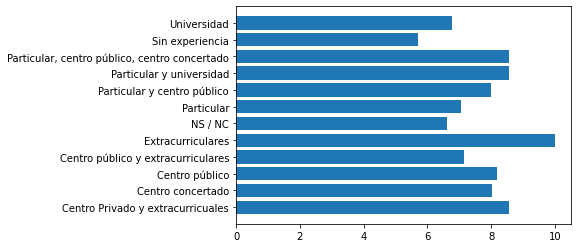

información_sobre_el/los_lugares_dónde_se_lleva_a_cabo_el_proyecto


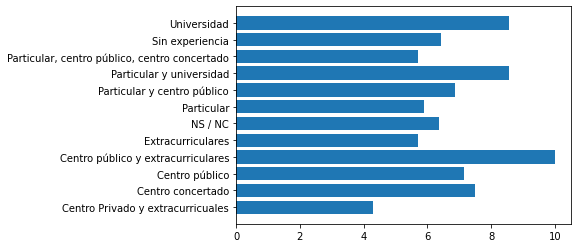

información_técnica_sobre_la_investigación_que_los_científicos_llevan_a_cabo_(ej._metodología)


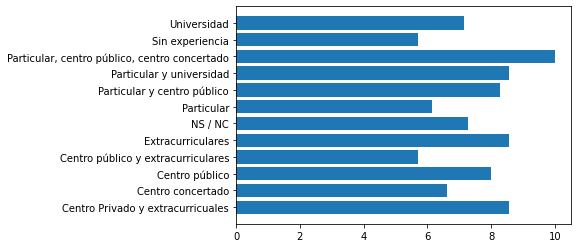

herramientas_utilizadas


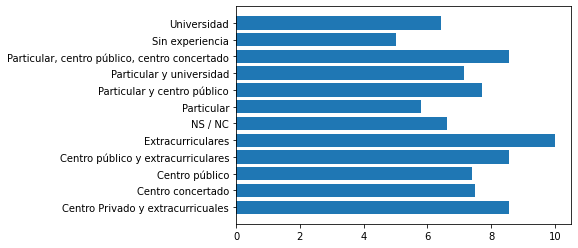

temática_o_campo_de_investigación_del_proyecto


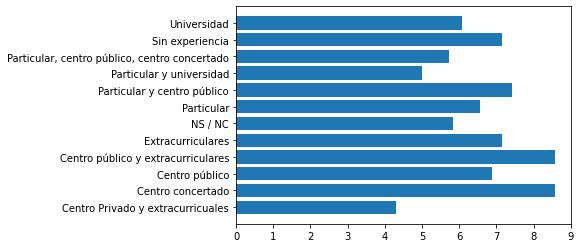

tareas_o_formas_de_participación_de_los_voluntarios


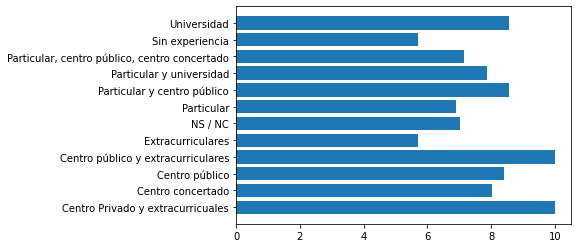

impacto_del_proyecto


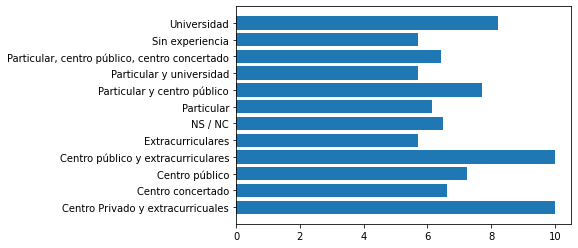

recursos_adicionales_(educativos_o_no)


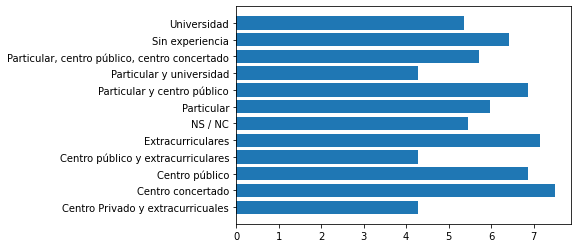

redes_sociales


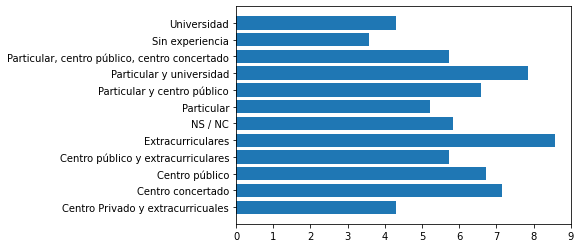

estado_del_proyecto


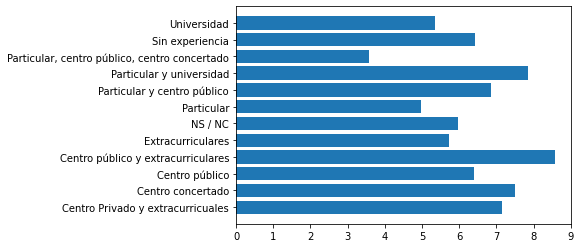

información_adicional_(ej._noticias,_artículos_científicos,_etc…)


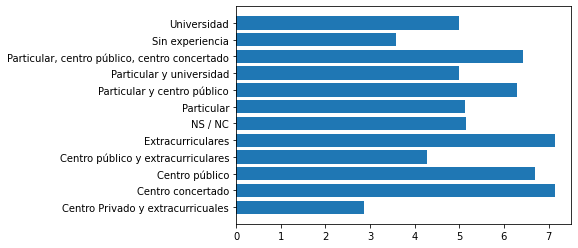

objetivos_de_aprendizaje_al_participar_en_el_proyecto


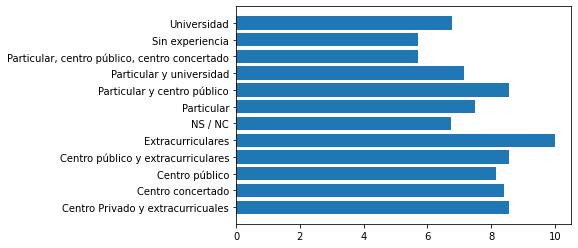

duración_de_las_tareas_o_de_la_participación_(si_fueran_varias)


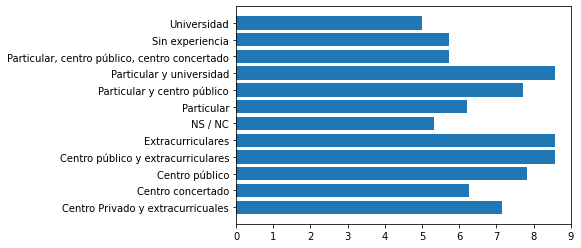

duración_del_proyecto


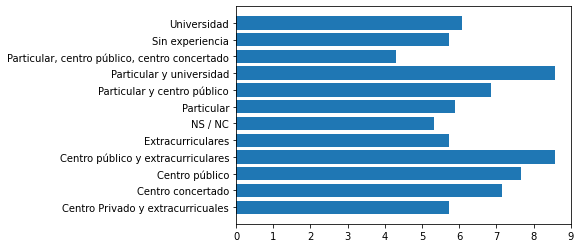

requisitos_para_participar,_si_los_hubiera_(ej._conocimiento_previo)


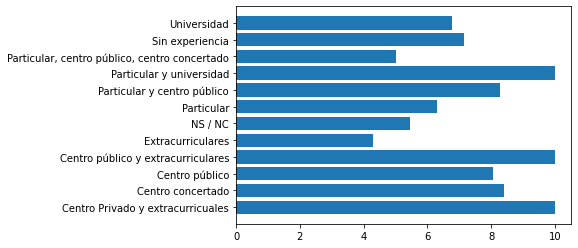

objetivos_de_aprendizaje


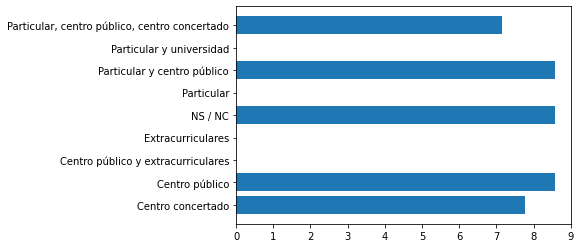

título_de_la_actividad


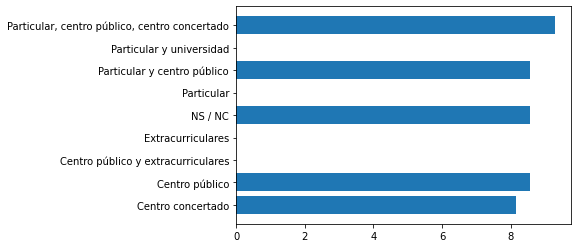

descripción_de_la_actividad


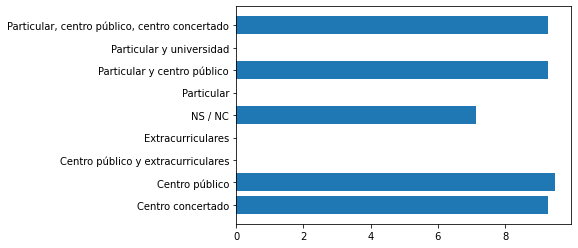

metodología_utilizada


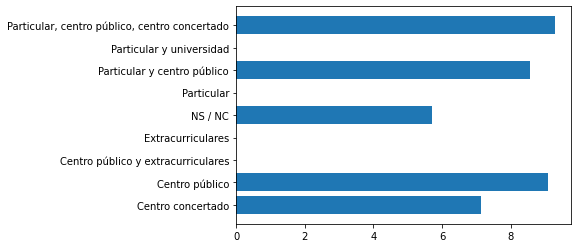

duración_de_la_actividad


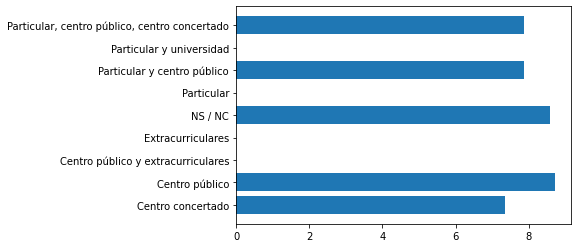

evaluación_de_la_actividad


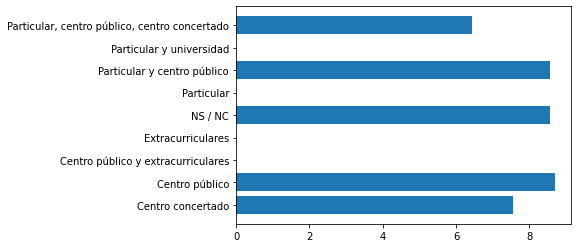

motivación_a_participar_o_durante_la_actividad


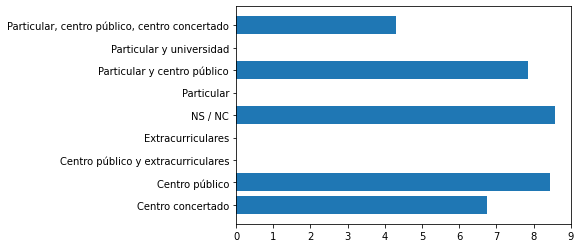

cómo_involucrar_a_la_comunidad_educativa_a_participar_en_la_actividad


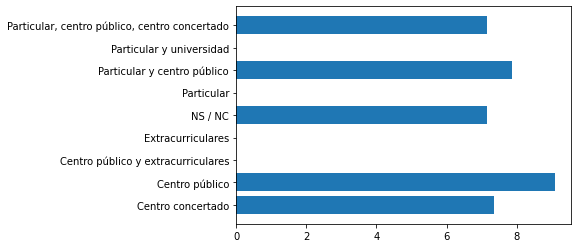

ámbito_en_el_que_se_desarrolla_la_actividad


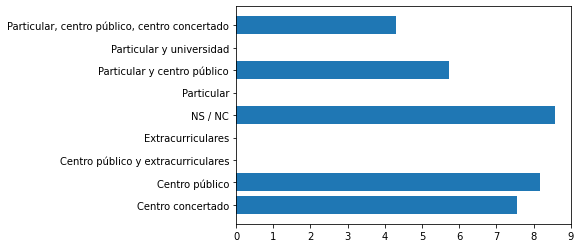

resultados_de_la_actividad


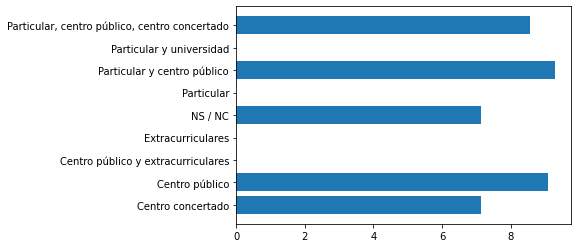

herramientas_a_utilizar


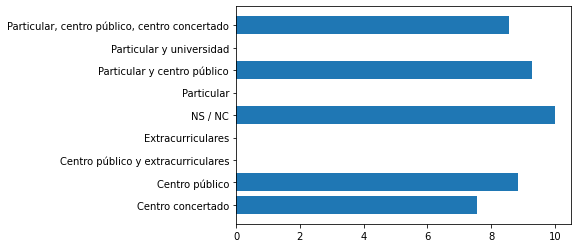

contenido_curricular


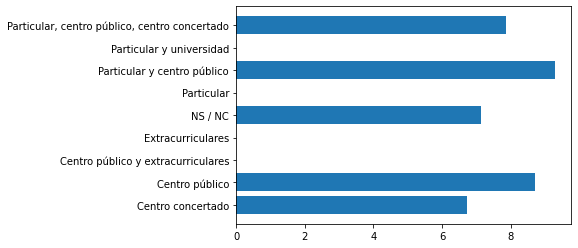

In [42]:
for col in df_taller_agg.columns:
    #filtramos con los que tienen la media mas alta que 8. Si se comenta vemos todos los tipos
    if col in Actividad + Proyecto + Pagina_Principal:
        print(col)
        fig, ax = plt.subplots()
        ax.barh(df_experiencia_agg.index,df_experiencia_agg[col])
        plt.show()

In [43]:
num_variables.remove('¿tienes_experiencia_previa_enseñando?')